# FUSION-TWAS
- Prepare input expression file
- h2 filter
- Make TWAS plot

In [1]:
library(data.table)
library(tidyverse)
# library(patchwork)
library(ggrepel)
library(VennDiagram)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()

Loading required package: grid

Loading required package: futile.logger



In [2]:
setwd("~/project-gandalm/isoform_twas/TWAS/")

## 1: Prepare input files
Follow GEUVADIS example data. Regress by covariates with optimal number of HCP. Exclude genes without cis-variants, or with 1 cis-variant (got error in compute weights step).
### 1-1: Write regressed gene expression file

In [3]:
rel <- read.table("../genotype/all_data/isec_R2_greater_than_3/ancestry/related.txt", header = F, stringsAsFactors = F)$V1

**ALL**

In [4]:
datExpr <- fread("../isoqtl_new/data/tx.counts.scaled.normalized.bed.gz", data.table = F)
info <- datExpr[,1:4]

datExpr <- datExpr[,5:ncol(datExpr)]
datExpr <- datExpr[,!names(datExpr) %in% rel]
dim(datExpr)

cov <- read.table("../isoqtl_new/data/70hcp_cov.txt", header = T, stringsAsFactors = F, check.names = F)
rownames(cov) <- cov$id
cov <- cov[,-1]
cov <- cov[,!names(cov) %in% rel]
dim(cov)
cov[cov=="F"] <- 0
cov[cov=="M"] <- 1
cov <- t(cov)
cov <- cbind(1, cov)
storage.mode(cov) <- "numeric"

Y <- as.matrix(datExpr)
X <- as.matrix(cov)

beta <- (solve(t(X)%*%X)%*%t(X))%*%t(Y)
datExpr_regressed <- Y - t(X[,-1]  %*% beta[-1,])

dat <- cbind(info, datExpr_regressed)
dat$end <- dat$ID
colnames(dat)[1:4] <- c("Chr","Coord","TargetID","Gene_Symbol")
dim(dat)
dat <- dat[,c(3,4,1,2,5:ncol(dat))]

ID <- data.frame(colnames(dat)[5:ncol(dat)], colnames(dat)[5:ncol(dat)])
write.table(ID, "data/all_iso_exp_regressed.txt.ID", col.names = F, row.names = F, quote = F, sep = "\t")

results <- fread("../isoqtl_new/results/mixed_perm_70hcp/all.chunks.txt.gz", data.table = F)
results <- results %>% filter(V2 > 1)
dat <- dat %>% filter(TargetID %in% results$V1)
dim(dat)
write.table(dat, "data/all_iso_exp_regressed.txt", col.names = T, row.names = F, quote = F, sep = "\t")

[1] 127986    626

[1]  77 626

[1] 127986    630

[1] 126865    630

In [4]:
datExpr <- fread("../eqtl_new/data/gene.counts.scaled.normalized.bed.gz", data.table = F)

In [6]:
info <- datExpr[,1:4]

datExpr <- datExpr[,5:ncol(datExpr)]
datExpr <- datExpr[,!names(datExpr) %in% rel]
dim(datExpr)

cov <- read.table("../eqtl_new/data/90hcp_cov.txt", header = T, stringsAsFactors = F, check.names = F)
rownames(cov) <- cov$id
cov <- cov[,-1]
cov <- cov[,!names(cov) %in% rel]
dim(cov)
cov[cov=="F"] <- 0
cov[cov=="M"] <- 1
cov <- t(cov)
cov <- cbind(1, cov)
storage.mode(cov) <- "numeric"

Y <- as.matrix(datExpr)
X <- as.matrix(cov)

beta <- (solve(t(X)%*%X)%*%t(X))%*%t(Y)
datExpr_regressed <- Y - t(X[,-1]  %*% beta[-1,])

dat <- cbind(info, datExpr_regressed)
dat$end <- dat$ID
colnames(dat)[1:4] <- c("Chr","Coord","TargetID","Gene_Symbol")
dim(dat)
dat <- dat[,c(3,4,1,2,5:ncol(dat))]

ID <- data.frame(colnames(dat)[5:ncol(dat)], colnames(dat)[5:ncol(dat)])
write.table(ID, "data/all_gene_exp_regressed.txt.ID", col.names = F, row.names = F, quote = F, sep = "\t")

results <- fread("../eqtl_new/results/mixed_perm_90hcp/all.chunks.txt.gz", data.table = F)
results <- results %>% filter(V2 > 1)
dat <- dat %>% filter(TargetID %in% results$V1)
dim(dat)
write.table(dat, "data/all_gene_exp_regressed.txt", col.names = T, row.names = F, quote = F, sep = "\t")

[1] 31947   629

[1]  97 629

[1] 31947   633

[1] 31531   633

**Trimester specific**

In [3]:
datExpr <- fread("../eqtl_new/data/eur/gene.counts.scaled.normalized.trimester1.bed.gz", data.table = F)

In [7]:
info <- datExpr[,1:4]

datExpr <- datExpr[,5:ncol(datExpr)]
datExpr <- datExpr[,!names(datExpr) %in% rel]
dim(datExpr)

cov <- read.table("../eqtl_new/data/eur/chuanjiao/tri1_25HCP.txt", header = T, stringsAsFactors = F, check.names = F)
rownames(cov) <- cov$id
cov <- cov[,-1]
cov <- cov[,!names(cov) %in% rel]
dim(cov)
cov[cov=="F"] <- 0
cov[cov=="M"] <- 1
cov <- t(cov)
cov <- cbind(1, cov)
storage.mode(cov) <- "numeric"

Y <- as.matrix(datExpr)
X <- as.matrix(cov)

beta <- (solve(t(X)%*%X)%*%t(X))%*%t(Y)
datExpr_regressed <- Y - t(X[,-1]  %*% beta[-1,])

dat <- cbind(info, datExpr_regressed)
dat$end <- dat$ID
colnames(dat)[1:4] <- c("Chr","Coord","TargetID","Gene_Symbol")
dim(dat)
dat <- dat[,c(3,4,1,2,5:ncol(dat))]

ID <- data.frame(colnames(dat)[5:ncol(dat)], colnames(dat)[5:ncol(dat)])
write.table(ID, "data/tri1_gene_exp_regressed.txt.ID", col.names = F, row.names = F, quote = F, sep = "\t")

results <- fread("../eqtl_new/results/eur_trimester/all_assoc_trimester1.txt", data.table = F)
results <- results %>% filter(nvar > 1)
dat <- dat %>% filter(TargetID %in% results$pid)
dim(dat)
write.table(dat, "data/tri1_gene_exp_regressed.txt", col.names = T, row.names = F, quote = F, sep = "\t")

[1] 31947   137

[1]  32 137

[1] 31947   141

[1] 31530   141

In [8]:
datExpr <- fread("../eqtl_new/data/eur/gene.counts.scaled.normalized.trimester2.bed.gz", data.table = F)
info <- datExpr[,1:4]

datExpr <- datExpr[,5:ncol(datExpr)]
datExpr <- datExpr[,!names(datExpr) %in% rel]
dim(datExpr)

cov <- read.table("../eqtl_new/data/eur/chuanjiao/tri2_15HCP.txt", header = T, stringsAsFactors = F, check.names = F)
rownames(cov) <- cov$id
cov <- cov[,-1]
cov <- cov[,!names(cov) %in% rel]
dim(cov)
cov[cov=="F"] <- 0
cov[cov=="M"] <- 1
cov <- t(cov)
cov <- cbind(1, cov)
storage.mode(cov) <- "numeric"

Y <- as.matrix(datExpr)
X <- as.matrix(cov)

beta <- (solve(t(X)%*%X)%*%t(X))%*%t(Y)
datExpr_regressed <- Y - t(X[,-1]  %*% beta[-1,])

dat <- cbind(info, datExpr_regressed)
dat$end <- dat$ID
colnames(dat)[1:4] <- c("Chr","Coord","TargetID","Gene_Symbol")
dim(dat)
dat <- dat[,c(3,4,1,2,5:ncol(dat))]

ID <- data.frame(colnames(dat)[5:ncol(dat)], colnames(dat)[5:ncol(dat)])
write.table(ID, "data/tri2_gene_exp_regressed.txt.ID", col.names = F, row.names = F, quote = F, sep = "\t")

results <- fread("../eqtl_new/results/eur_trimester/all_assoc_trimester2.txt", data.table = F)
results <- results %>% filter(nvar > 1)
dat <- dat %>% filter(TargetID %in% results$pid)
dim(dat)
write.table(dat, "data/tri2_gene_exp_regressed.txt", col.names = T, row.names = F, quote = F, sep = "\t")

[1] 31947   141

[1]  22 141

[1] 31947   145

[1] 31530   145

**Sex specific**

In [25]:
datExpr <- fread("../eqtl_new/data/genes.m.bed.gz", data.table = F)
info <- datExpr[,1:4]

datExpr <- datExpr[,5:ncol(datExpr)]
datExpr <- datExpr[,!names(datExpr) %in% rel]
dim(datExpr)
cov <- read.table("../eqtl_new/data/sex_specific/m_50HCP_cov.txt", header = T, stringsAsFactors = F, check.names = F)
rownames(cov) <- cov$id
cov <- cov[,-1]
cov <- cov[,!names(cov) %in% rel]
dim(cov)
cov[cov=="F"] <- 0
cov[cov=="M"] <- 1
cov <- cov[-6,]
cov <- t(cov)
cov <- cbind(1, cov)
storage.mode(cov) <- "numeric"

Y <- as.matrix(datExpr)
X <- as.matrix(cov)

beta <- (solve(t(X)%*%X)%*%t(X))%*%t(Y)

datExpr_regressed <- Y - t(X[,-1]  %*% beta[-1,])

dat <- cbind(info, datExpr_regressed)
dat$end <- dat$ID
colnames(dat)[1:4] <- c("Chr","Coord","TargetID","Gene_Symbol")
dim(dat)
dat <- dat[,c(3,4,1,2,5:ncol(dat))]

ID <- data.frame(colnames(dat)[5:ncol(dat)], colnames(dat)[5:ncol(dat)])
write.table(ID, "data/male_gene_exp_regressed.txt.ID", col.names = F, row.names = F, quote = F, sep = "\t")

results <- fread("../eqtl_new/results/ALL_m_perm_50hcp/all.chunks.txt.gz", data.table = F)
results <- results %>% filter(V2 > 1)
dat <- dat %>% filter(TargetID %in% results$V1)
dim(dat)
write.table(dat, "data/male_gene_exp_regressed.txt", col.names = T, row.names = F, quote = F, sep = "\t")

[1] 31947   332

[1]  57 332

[1] 31947   336

[1] 31531   336

In [26]:
datExpr <- fread("../eqtl_new/data/genes.f.bed.gz", data.table = F)
info <- datExpr[,1:4]

datExpr <- datExpr[,5:ncol(datExpr)]
datExpr <- datExpr[,!names(datExpr) %in% rel]
dim(datExpr)
cov <- read.table("../eqtl_new/data/sex_specific/f_50HCP_cov.txt", header = T, stringsAsFactors = F, check.names = F)
rownames(cov) <- cov$id
cov <- cov[,-1]
cov <- cov[,!names(cov) %in% rel]
dim(cov)
cov[cov=="F"] <- 0
cov[cov=="M"] <- 1
cov <- cov[-6,]
cov <- t(cov)
cov <- cbind(1, cov)
storage.mode(cov) <- "numeric"

Y <- as.matrix(datExpr)
X <- as.matrix(cov)

beta <- (solve(t(X)%*%X)%*%t(X))%*%t(Y)

datExpr_regressed <- Y - t(X[,-1]  %*% beta[-1,])

dat <- cbind(info, datExpr_regressed)
dat$end <- dat$ID
colnames(dat)[1:4] <- c("Chr","Coord","TargetID","Gene_Symbol")
dim(dat)
dat <- dat[,c(3,4,1,2,5:ncol(dat))]

ID <- data.frame(colnames(dat)[5:ncol(dat)], colnames(dat)[5:ncol(dat)])
write.table(ID, "data/female_gene_exp_regressed.txt.ID", col.names = F, row.names = F, quote = F, sep = "\t")

results <- fread("../eqtl_new/results/ALL_f_perm_50hcp/all.chunks.txt.gz", data.table = F)
results <- results %>% filter(V2 > 1)
dat <- dat %>% filter(TargetID %in% results$V1)
dim(dat)
write.table(dat, "data/female_gene_exp_regressed.txt", col.names = T, row.names = F, quote = F, sep = "\t")

[1] 31947   297

[1]  57 297

[1] 31947   301

[1] 31196   301

**EUR**

In [4]:
datExpr <- fread("../eqtl_new/data/eur/gene.counts.scaled.normalized.bed.gz", data.table = F)

In [5]:
info <- datExpr[,1:4]

In [6]:
datExpr <- datExpr[,5:ncol(datExpr)]

In [7]:
datExpr <- datExpr[,!names(datExpr) %in% rel]
dim(datExpr)

[1] 31947   280

In [8]:
cov <- read.table("../eqtl_new/data/eur/50HCP_cov.txt", header = T, stringsAsFactors = F, check.names = F)

In [9]:
head(cov)

,id,898,1038,1046,1102,1107,1110,1111,1115,1117,...,RNAID1922,RNAID1936,RNAID1938,RNAID1939,RNAID1944,RNAID1952,RNAID1974,RNAID1983,RNAID1987,RNAID2144
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,PC1,-0.00895342,-0.00876532,-0.00886473,-0.00853766,-0.00728483,-0.0085298,-0.00767994,-0.00878768,-0.0141626,...,-0.0115352,0.0154756,-0.0140697,-0.0124017,-0.0116278,-0.0112696,-0.0128137,-0.0125878,-0.0127816,-0.0121041
2,PC2,-0.020861,-0.021402,-0.0215634,-0.0206188,-0.020501,-0.0208467,-0.0206434,-0.0210645,-0.0214087,...,-0.0152795,-0.0106044,-0.0206599,-0.0168367,-0.0140172,-0.0119532,-0.0196731,-0.0165026,-0.0124385,-0.0157224
3,PC3,0.0131582,0.0135121,0.0128837,0.0126211,0.0125649,0.0125961,0.0128211,0.0123994,0.00723602,...,-0.00950417,0.00488306,0.00694735,0.0021519,0.0102596,0.00991078,0.00359194,0.00828654,0.0109352,0.00926182
4,PC4,0.0192979,0.0199749,0.0197987,0.0199913,0.0187359,0.0194312,0.0204932,0.0198501,0.00786276,...,0.00246145,0.00349381,0.00688053,0.00330154,-0.00788228,-0.00469761,0.00642687,-0.000235182,-0.00763444,-0.00200263
5,PC5,0.0873849,0.0884509,0.0857845,0.0884136,0.0881097,0.0890663,0.0876953,0.0876118,-0.0168338,...,-0.0173229,-0.00890469,-0.0179644,-0.0152379,-0.0125848,-0.012658,-0.0176661,-0.014667,-0.0128655,-0.0158602
6,sex,F,M,F,F,M,M,M,F,M,...,F,M,M,M,F,F,M,F,M,F


In [10]:
rownames(cov) <- cov$id
cov <- cov[,-1]
cov <- cov[,!names(cov) %in% rel]
dim(cov)

[1]  57 280

In [11]:
cov[cov=="F"] <- 0
cov[cov=="M"] <- 1

In [16]:
# For Daniel, trimester environment interaction genetic correlation models
# regress by all covariates except age
cov <- cov[-57,]

cov <- t(cov)
cov <- cbind(1, cov)
storage.mode(cov) <- "numeric"

Y <- as.matrix(datExpr)
X <- as.matrix(cov)

beta <- (solve(t(X)%*%X)%*%t(X))%*%t(Y)
datExpr_regressed <- Y - t(X[,-1]  %*% beta[-1,])

dat <- cbind(info, datExpr_regressed)
dat$end <- dat$ID
colnames(dat)[1:4] <- c("Chr","Coord","TargetID","Gene_Symbol")

dat <- dat[,c(3,4,1,2,5:ncol(dat))]

results <- fread("../eqtl_new/results/eur_perm_50HCP/all.chunks.txt.gz", data.table = F)
results <- results %>% filter(V2 > 1)

dat <- dat %>% filter(TargetID %in% results$V1)

write.table(dat, "../eqtl_new/data/eur/eur_gene_exp_regressed_sex_gPC_50HCP.txt", col.names = T, row.names = F, quote = F, sep = "\t")

In [17]:
dim(cov)

[1] 280  57

In [11]:
# For TWAS, cov includes all
cov <- t(cov)
cov <- cbind(1, cov)
storage.mode(cov) <- "numeric"

Y <- as.matrix(datExpr)
X <- as.matrix(cov)

beta <- (solve(t(X)%*%X)%*%t(X))%*%t(Y)
datExpr_regressed <- Y - t(X[,-1]  %*% beta[-1,])

In [12]:
dat <- cbind(info, datExpr_regressed)
dat$end <- dat$ID
colnames(dat)[1:4] <- c("Chr","Coord","TargetID","Gene_Symbol")

In [13]:
head(dat)

,Chr,Coord,TargetID,Gene_Symbol,898,1038,1046,1102,1107,1110,⋯,RNAID1922,RNAID1936,RNAID1938,RNAID1939,RNAID1944,RNAID1952,RNAID1974,RNAID1983,RNAID1987,RNAID2144
,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,11868,ENSG00000223972,ENSG00000223972,2.565564,3.6053417,1.8360737,1.9991702,1.904191,3.5480882,⋯,2.132243,3.3003805,3.177607,3.5299871,2.848982,4.073260,2.0589195,3.457027,2.875230,2.002251
2,1,29553,ENSG00000243485,ENSG00000243485,2.819398,1.0959469,2.8483054,2.1622183,1.571914,1.7570492,⋯,1.433819,2.6111706,1.270131,3.1224558,1.802944,1.197524,3.4933517,1.986875,2.338058,2.558506
3,1,29569,ENSG00000227232,ENSG00000227232,8.340482,8.7758971,9.3344082,8.3531372,8.590556,8.7678620,⋯,8.770681,8.2024261,7.868934,8.7785143,8.892686,8.820818,8.2291373,9.059215,8.577134,8.435131
4,1,36080,ENSG00000237613,ENSG00000237613,3.901713,3.1812980,3.1201478,4.1157479,3.414270,4.7278982,⋯,0.557910,3.9508007,2.696453,3.7811057,4.542311,4.005088,2.7271515,1.380424,3.161670,4.537650
5,1,91104,ENSG00000239945,ENSG00000239945,1.720500,0.5282807,0.5575717,0.6424397,1.850878,-0.2967324,⋯,1.929382,-0.4598936,2.152505,0.9581094,1.473670,1.593463,0.6791255,0.365894,0.664181,1.591270
6,1,131024,ENSG00000233750,ENSG00000233750,5.220183,4.4191885,3.8402640,4.3866399,5.164541,4.8757581,⋯,4.957508,4.0326060,4.023465,4.7190258,4.536816,3.629671,4.2418672,4.279393,4.052386,4.469380


In [15]:
dim(dat)

[1] 31947   284

In [16]:
dat <- dat[,c(3,4,1,2,5:ncol(dat))]

### 1-2: Write ID file
Note FID is IID, not 0. BIM file is like that.

In [17]:
ID <- data.frame(colnames(dat)[5:ncol(dat)], colnames(dat)[5:ncol(dat)])
head(ID)

,colnames.dat..5.ncol.dat..,colnames.dat..5.ncol.dat...1
,<fct>,<fct>
1,898,898
2,1038,1038
3,1046,1046
4,1102,1102
5,1107,1107
6,1110,1110


In [18]:
dim(ID)

[1] 280   2

In [20]:
write.table(ID, "data/eur_gene_exp_regressed.txt.ID", col.names = F, row.names = F, quote = F, sep = "\t")

### 1-3: Exclude genes with 0 or 1 cis SNP

In [22]:
results <- fread("../eqtl_new/results/eur_perm_50HCP/all.chunks.txt.gz", data.table = F)

In [23]:
dim(results)

[1] 31947    11

In [24]:
sum(results$V2%in%c(0,1))

[1] 417

In [25]:
results <- results %>% filter(V2 > 1)
dim(results)

[1] 31530    11

In [26]:
dat <- dat %>% filter(TargetID %in% results$V1)

In [28]:
dim(dat)

[1] 31530   284

In [29]:
write.table(dat, "data/eur_gene_exp_regressed.txt", col.names = T, row.names = F, quote = F, sep = "\t")

**AMR**

In [30]:
datExpr <- fread("../eqtl_new/data/amr/gene.counts.scaled.normalized.bed.gz", data.table = F)
info <- datExpr[,1:4]
datExpr <- datExpr[,5:ncol(datExpr)]
datExpr <- datExpr[,!names(datExpr) %in% rel]
dim(datExpr)

cov <- read.table("../eqtl_new/data/amr/15HCP_cov.txt", header = T, stringsAsFactors = F, check.names = F)
rownames(cov) <- cov$id
cov <- cov[,-1]
cov <- cov[,!names(cov) %in% rel]
dim(cov)
cov[cov=="F"] <- 0
cov[cov=="M"] <- 1
cov <- t(cov)
cov <- cbind(1, cov)
storage.mode(cov) <- "numeric"

Y <- as.matrix(datExpr)
X <- as.matrix(cov)

beta <- (solve(t(X)%*%X)%*%t(X))%*%t(Y)
datExpr_regressed <- Y - t(X[,-1]  %*% beta[-1,])

dat <- cbind(info, datExpr_regressed)
dat$end <- dat$ID
colnames(dat)[1:4] <- c("Chr","Coord","TargetID","Gene_Symbol")
dim(dat)
dat <- dat[,c(3,4,1,2,5:ncol(dat))]

ID <- data.frame(colnames(dat)[5:ncol(dat)], colnames(dat)[5:ncol(dat)])
write.table(ID, "data/amr_gene_exp_regressed.txt.ID", col.names = F, row.names = F, quote = F, sep = "\t")

results <- fread("../eqtl_new/results/amr_perm_15HCP/all.chunks.txt.gz", data.table = F)
results <- results %>% filter(V2 > 1)
dat <- dat %>% filter(TargetID %in% results$V1)
dim(dat)
write.table(dat, "data/amr_gene_exp_regressed.txt", col.names = T, row.names = F, quote = F, sep = "\t")

[1] 31947   162

[1]  22 162

[1] 31947   166

[1] 31531   166

**AFR**

In [31]:
datExpr <- fread("../eqtl_new/data/afr/gene.counts.scaled.normalized.bed.gz", data.table = F)
info <- datExpr[,1:4]
datExpr <- datExpr[,5:ncol(datExpr)]
datExpr <- datExpr[,!names(datExpr) %in% rel]
dim(datExpr)

cov <- read.table("../eqtl_new/data/afr/25HCP_cov.txt", header = T, stringsAsFactors = F, check.names = F)
rownames(cov) <- cov$id
cov <- cov[,-1]
cov <- cov[,!names(cov) %in% rel]
dim(cov)
cov[cov=="F"] <- 0
cov[cov=="M"] <- 1
cov <- t(cov)
cov <- cbind(1, cov)
storage.mode(cov) <- "numeric"

Y <- as.matrix(datExpr)
X <- as.matrix(cov)

beta <- (solve(t(X)%*%X)%*%t(X))%*%t(Y)
datExpr_regressed <- Y - t(X[,-1]  %*% beta[-1,])

dat <- cbind(info, datExpr_regressed)
dat$end <- dat$ID
colnames(dat)[1:4] <- c("Chr","Coord","TargetID","Gene_Symbol")
dim(dat)
dat <- dat[,c(3,4,1,2,5:ncol(dat))]

ID <- data.frame(colnames(dat)[5:ncol(dat)], colnames(dat)[5:ncol(dat)])
write.table(ID, "data/afr_gene_exp_regressed.txt.ID", col.names = F, row.names = F, quote = F, sep = "\t")

results <- fread("../eqtl_new/results/afr_perm_25HCP/all.chunks.txt.gz", data.table = F)
results <- results %>% filter(V2 > 1)
dat <- dat %>% filter(TargetID %in% results$V1)
dim(dat)
write.table(dat, "data/afr_gene_exp_regressed.txt", col.names = T, row.names = F, quote = F, sep = "\t")

[1] 31947   135

[1]  32 135

[1] 31947   139

[1] 31531   139

**EUR splicing (for heritability analysis of trimesters)**

In [4]:
datExpr <- fread("../sqtl_new/data/eur/lc_combat.bed.gz", data.table = F)
info <- datExpr[,1:4]
datExpr <- datExpr[,5:ncol(datExpr)]
datExpr <- datExpr[,!names(datExpr) %in% rel]
dim(datExpr)

[1] 273167    288

In [5]:
cov <- read.table("../sqtl_new/data/eur/20HCP_cov.txt", header = T, stringsAsFactors = F, check.names = F)
rownames(cov) <- cov$id
cov <- cov[,-1]
cov <- cov[,!names(cov) %in% rel]
dim(cov)
cov[cov=="F"] <- 0
cov[cov=="M"] <- 1
cov <- t(cov)
cov <- cbind(1, cov)
storage.mode(cov) <- "numeric"

Y <- as.matrix(datExpr)
X <- as.matrix(cov)

[1]  27 288

In [6]:
beta <- (solve(t(X)%*%X)%*%t(X))%*%t(Y)
datExpr_regressed <- Y - t(X[,-1]  %*% beta[-1,])

In [7]:
dat <- cbind(info, datExpr_regressed)
dat$end <- dat$ID
colnames(dat)[1:4] <- c("Chr","Coord","TargetID","Gene_Symbol")
dim(dat)
dat <- dat[,c(3,4,1,2,5:ncol(dat))]

# ID <- data.frame(colnames(dat)[5:ncol(dat)], colnames(dat)[5:ncol(dat)])
# write.table(ID, "data/afr_gene_exp_regressed.txt.ID", col.names = F, row.names = F, quote = F, sep = "\t")

results <- fread("../sqtl_new/results/eur_perm_20HCP_1e6/all.chunks.txt.gz", data.table = F)
results <- results %>% filter(V2 > 1)
dat <- dat %>% filter(TargetID %in% results$V1)
dim(dat)
write.table(dat, "data/eur_intron_regressed.txt", col.names = T, row.names = F, quote = F, sep = "\t")

[1] 273167    292

[1] 270197    292

## 2: h2

**ALL, LDREF**

In [3]:
hsq_all <- fread("results/gene_all_LDREF_rn/hsq/concat_hsq.txt", data.table = F)
hsq_all <- hsq_all %>% filter(complete.cases(hsq_all))
dim(hsq_all)

[1] 27290     4

In [4]:
colnames(hsq_all) <- c("gene","h2","se","pval")

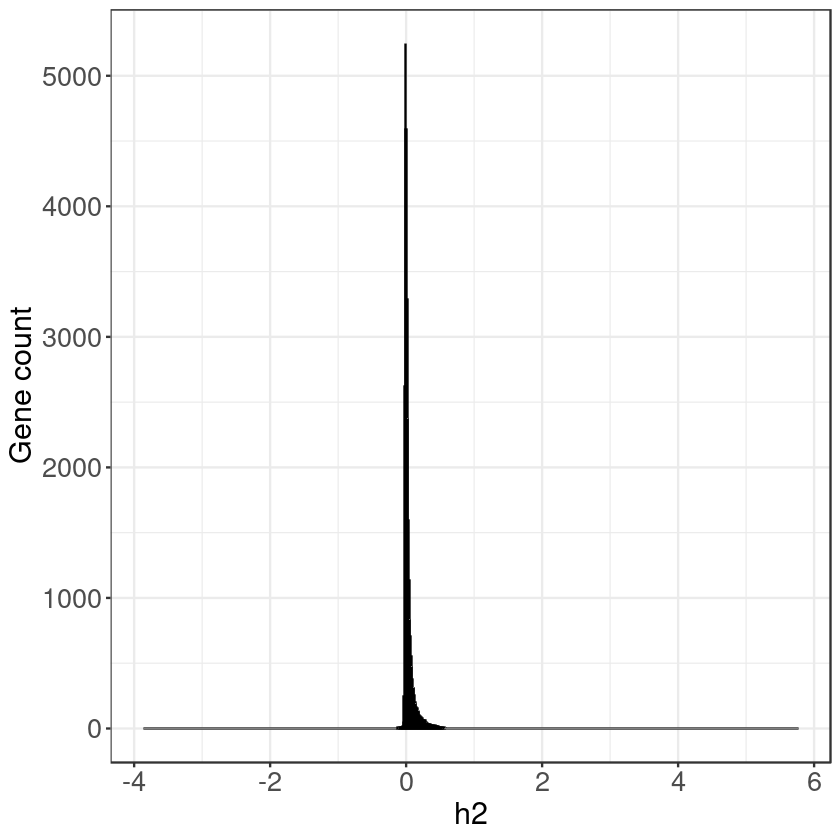

In [7]:
ggplot(hsq_all, aes(x = h2)) +
    geom_histogram(binwidth = 0.01, color = "black", fill = "white") +
    theme_bw() +
    labs(x = "h2", y = "Gene count") +
    theme(axis.text = element_text(size=16),
          axis.title = element_text(size=18))

In [5]:
sig_all <- hsq_all %>% filter(pval < .05, h2 > 0) %>% select(gene)
hsq_all_sig <- hsq_all %>% filter(gene %in% sig_all$gene)
dim(hsq_all_sig)

[1] 7307    4

In [8]:
head(hsq_all_sig)

,gene,h2,se,pval
,<chr>,<dbl>,<dbl>,<dbl>
1,WEIGHTS/ENSG00000285410,0.502373,0.052265,0.0000e+00
2,WEIGHTS/ENSG00000244879,0.552007,0.049301,0.0000e+00
3,WEIGHTS/ENSG00000092439,0.023342,0.020028,3.7558e-02
4,WEIGHTS/ENSG00000273674,0.139275,0.048915,1.2174e-07
5,WEIGHTS/ENSG00000183578,0.067593,0.035134,6.7476e-04
6,WEIGHTS/ENSG00000186417,0.184801,0.057285,1.6290e-06


In [6]:
hsq_all_sig %>% arrange(desc(h2)) %>% head()

,gene,h2,se,pval
,<chr>,<dbl>,<dbl>,<dbl>
1,WEIGHTS/ENSG00000286473,5.758790,0.013335,0.0024949
2,WEIGHTS/ENSG00000255389,0.770373,0.030983,0.0000000
3,WEIGHTS/ENSG00000144115,0.682947,0.046792,0.0000000
4,WEIGHTS/ENSG00000225138,0.661293,0.043740,0.0000000
5,WEIGHTS/ENSG00000237975,0.629856,0.043923,0.0000000
6,WEIGHTS/ENSG00000174652,0.625154,0.040294,0.0000000


In [8]:
hsq_all_sig <- hsq_all_sig %>% filter(h2 < 1)

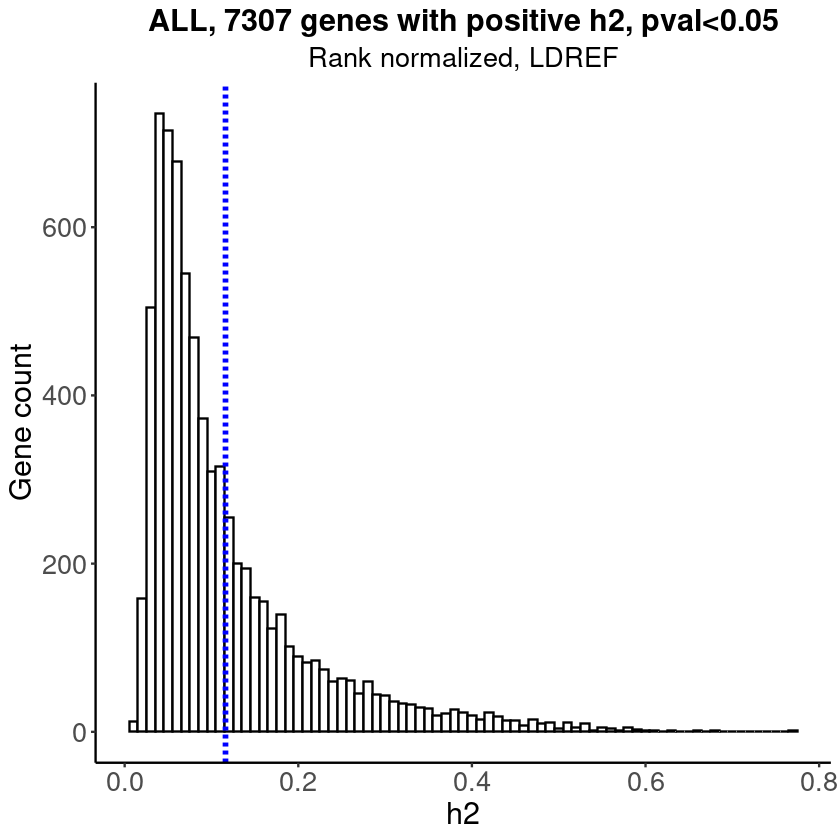

In [9]:
ggplot(hsq_all_sig, aes(x = h2)) +
    geom_histogram(binwidth = 0.01, color = "black", fill = "white") +
    theme_classic() +
    labs(x = "h2", y = "Gene count", title = "ALL, 7307 genes with positive h2, pval<0.05",
         subtitle = "Rank normalized, LDREF") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold", hjust = .5),
          plot.subtitle = element_text(size = 16, hjust = .5)) +
    geom_vline(xintercept = mean(hsq_all_sig$h2), linetype = "dashed", color = "blue", size = 1.2)

In [10]:
ggsave("figures/gcta_rn_all_ldref.pdf", height = 6, width = 6)

**ALL, no LDREF**

In [14]:
hsq_all <- fread("results/gene_all_rn/hsq/concat_hsq.txt", data.table = F)
hsq_all <- hsq_all %>% filter(complete.cases(hsq_all))
dim(hsq_all)

[1] 27128     4

In [15]:
colnames(hsq_all) <- c("gene","h2","se","pval")

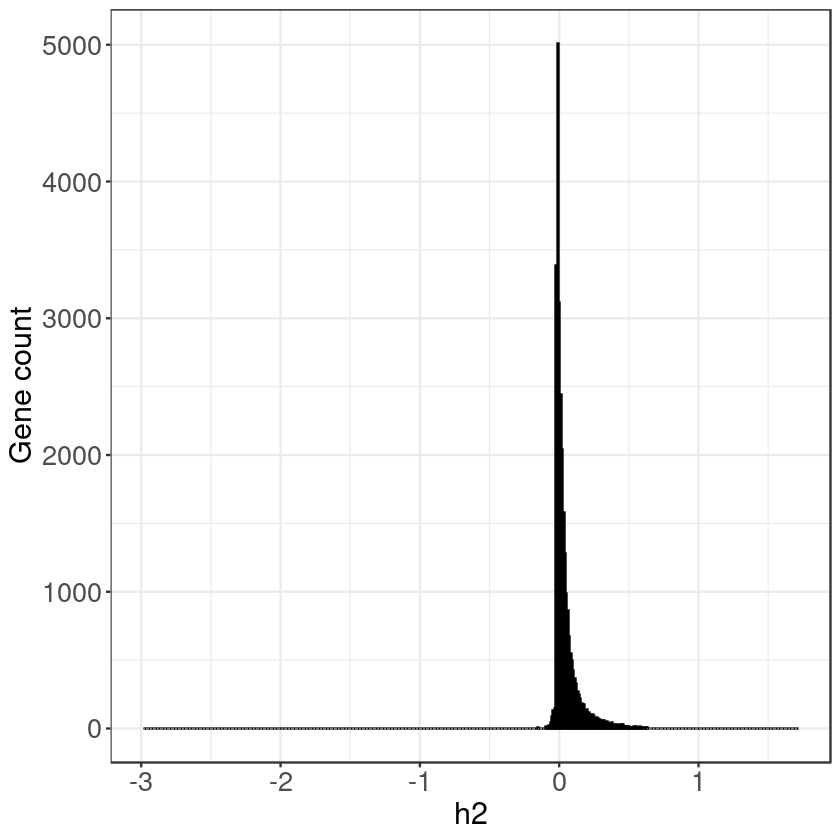

In [5]:
ggplot(hsq_all, aes(x = h2)) +
    geom_histogram(binwidth = 0.01, color = "black", fill = "white") +
    theme_bw() +
    labs(x = "h2", y = "Gene count") +
    theme(axis.text = element_text(size=16),
          axis.title = element_text(size=18))

In [16]:
sig_all <- hsq_all %>% filter(pval < .05, h2 > 0) %>% select(gene)
hsq_all_sig <- hsq_all %>% filter(gene %in% sig_all$gene)
dim(hsq_all_sig)

[1] 7661    4

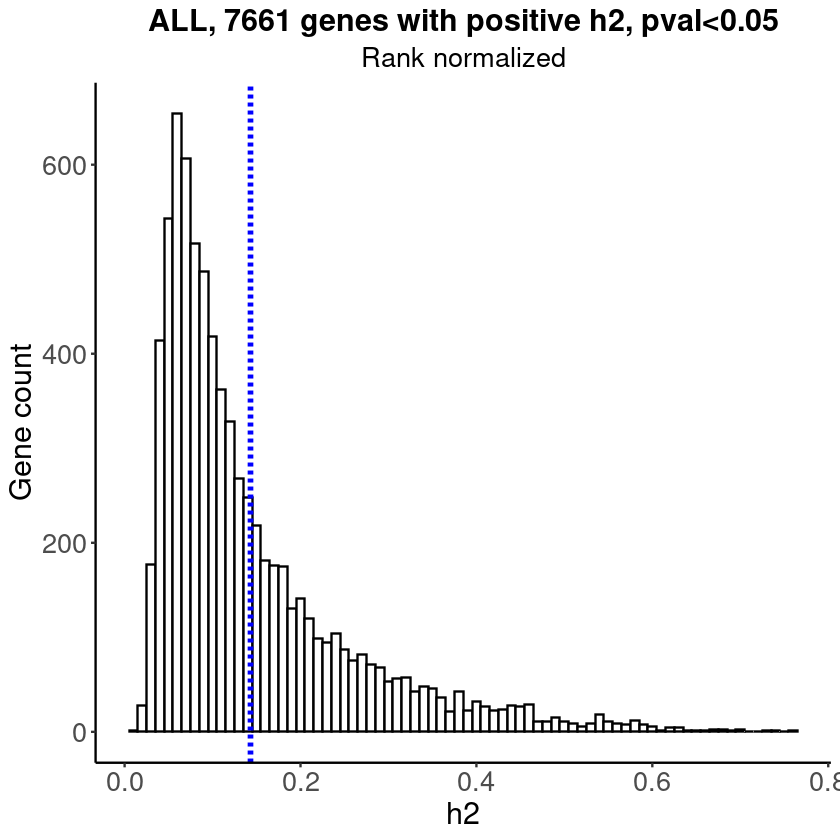

In [12]:
ggplot(hsq_all_sig, aes(x = h2)) +
    geom_histogram(binwidth = 0.01, color = "black", fill = "white") +
    theme_classic() +
    labs(x = "h2", y = "Gene count", title = "ALL, 7661 genes with positive h2, pval<0.05",
         subtitle = "Rank normalized") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold", hjust = .5),
          plot.subtitle = element_text(size = 16, hjust = .5)) +
    geom_vline(xintercept = mean(hsq_all_sig$h2), linetype = "dashed", color = "blue", size = 1.2)

In [13]:
ggsave("figures/gcta_rn_all.pdf", height = 6, width = 6)

In [11]:
hsq_tri <- fread("results/gene_tri1_LDREF_rn/hsq/concat_hsq.txt", data.table = F)
hsq_tri <- hsq_tri %>% filter(complete.cases(hsq_tri))
colnames(hsq_tri) <- c("gene","h2","se","pval")
hsq_tri1_sig <- hsq_tri %>% filter(pval < .05, h2 > 0)
dim(hsq_tri1_sig)

[1] 4224    4

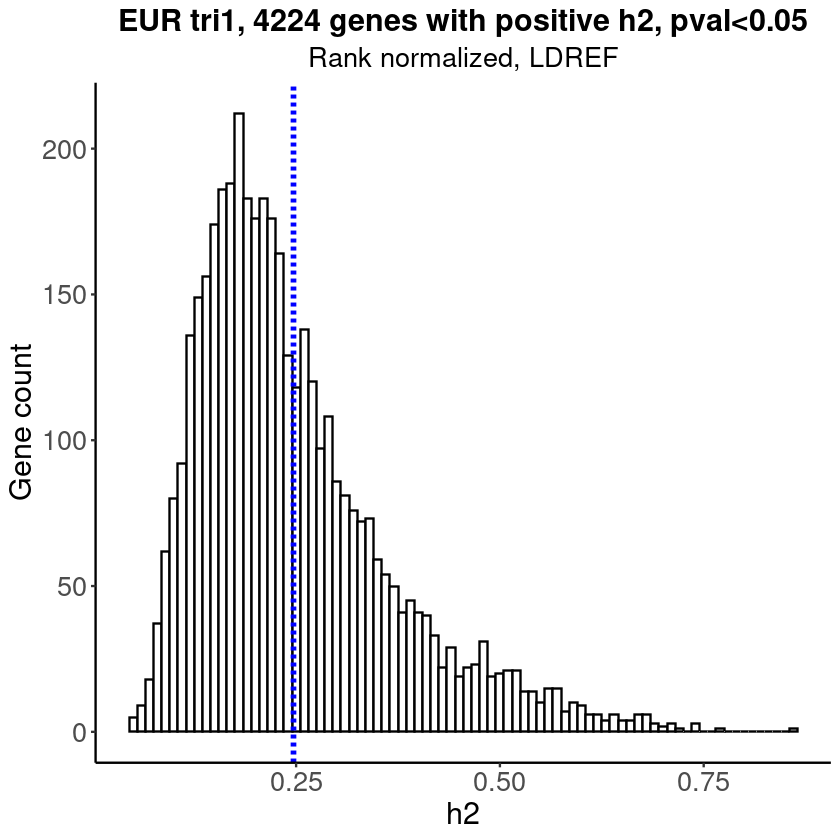

In [12]:
ggplot(hsq_tri1_sig, aes(x = h2)) +
    geom_histogram(binwidth = 0.01, color = "black", fill = "white") +
    theme_classic() +
    labs(x = "h2", y = "Gene count", title = "EUR tri1, 4224 genes with positive h2, pval<0.05",
         subtitle = "Rank normalized, LDREF") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold", hjust = .5),
          plot.subtitle = element_text(size = 16, hjust = .5)) +
    geom_vline(xintercept = mean(hsq_tri1_sig$h2), linetype = "dashed", color = "blue", size = 1.2)
ggsave("figures/gcta_rn_eur_tri1_ldref.pdf", height = 6, width = 7)

In [13]:
hsq_tri <- fread("results/gene_tri2_LDREF_rn/hsq/concat_hsq.txt", data.table = F)
hsq_tri <- hsq_tri %>% filter(complete.cases(hsq_tri))
colnames(hsq_tri) <- c("gene","h2","se","pval")
hsq_tri2_sig <- hsq_tri %>% filter(pval < .05, h2 > 0)
dim(hsq_tri2_sig)

[1] 2995    4

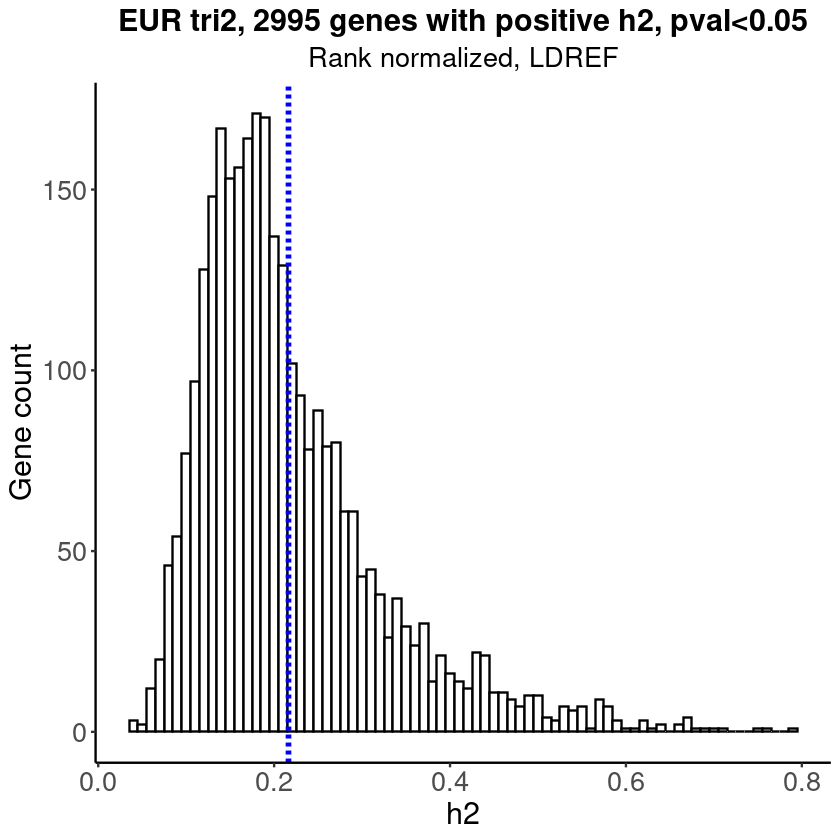

In [14]:
ggplot(hsq_tri2_sig, aes(x = h2)) +
    geom_histogram(binwidth = 0.01, color = "black", fill = "white") +
    theme_classic() +
    labs(x = "h2", y = "Gene count", title = "EUR tri2, 2995 genes with positive h2, pval<0.05",
         subtitle = "Rank normalized, LDREF") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold", hjust = .5),
          plot.subtitle = element_text(size = 16, hjust = .5)) +
    geom_vline(xintercept = mean(hsq_tri2_sig$h2), linetype = "dashed", color = "blue", size = 1.2)
ggsave("figures/gcta_rn_eur_tri2_ldref.pdf", height = 6, width = 7)

In [17]:
head(hsq_all_sig)

,gene,h2,se,pval
,<chr>,<dbl>,<dbl>,<dbl>
1,WEIGHTS/ENSG00000285410,0.575523,0.048630,0.0000e+00
2,WEIGHTS/ENSG00000244879,0.590303,0.047105,0.0000e+00
3,WEIGHTS/ENSG00000092439,0.031296,0.024278,2.6880e-02
4,WEIGHTS/ENSG00000273674,0.124826,0.042364,1.9640e-08
5,WEIGHTS/ENSG00000183578,0.073617,0.035932,7.5845e-04
6,WEIGHTS/ENSG00000186417,0.201318,0.059769,2.9683e-05


In [15]:
#n12
sum(hsq_all_sig$gene %in% hsq_tri1_sig$gene)
#n13
sum(hsq_all_sig$gene %in% hsq_tri2_sig$gene)
#n23
sum(hsq_tri1_sig$gene %in% hsq_tri2_sig$gene)
#n123
length(Reduce(intersect, list(hsq_all_sig$gene,hsq_tri1_sig$gene,hsq_tri2_sig$gene)))

[1] 2845

[1] 2069

[1] 1350

[1] 1297

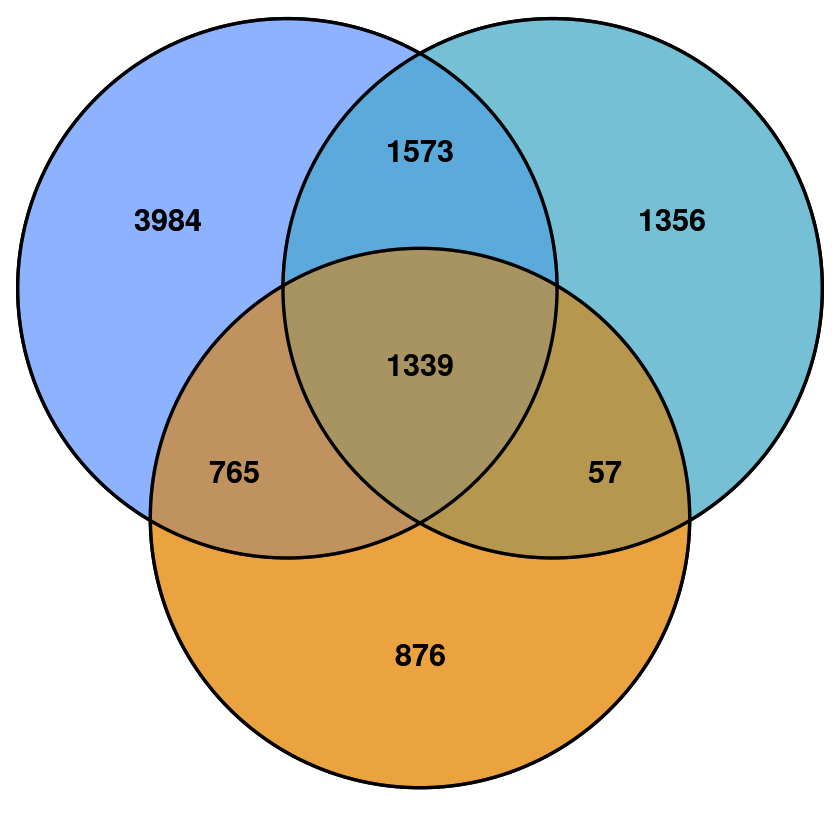

In [21]:
myCol <- c("#6699FF", "#46ACC8", "#E58601")
# area1, area2, area3, n12, n23, n13, n123
venn.plot <- draw.triple.venn(7661, 4325, 3037, 2912, 1396, 2104, 1339, 
                              fill = myCol,
                              alpha = c(.5,.5,.5),
                              cex = 1.5,
                              fontface = 2,
                              fontfamily = rep("sans",7),
                              category = c("", "", ""), 
                              scaled = TRUE)
grid.draw(venn.plot)

In [22]:
# are these trimester specific eGenes?
all <- fread("../eqtl_new/results/mixed_perm_90hcp/sig_pheno.txt", data.table = F)
tri1 <- fread("../eqtl_new/results/eur_trimester/sig_pheno_trimester1.txt", data.table = F)

In [23]:
specific <- tri1 %>% filter(!pid %in% all$pid)
dim(specific)

[1] 1131   13

In [25]:
hsq_tri1_sig$gene <- gsub("WEIGHTS/", "", hsq_tri1_sig$gene)
hsq_all_sig$gene <- gsub("WEIGHTS/", "", hsq_all_sig$gene)

In [27]:
twas_specific <- hsq_tri1_sig %>% filter(!gene %in% hsq_all_sig$gene)
dim(twas_specific)

[1] 1413    4

In [28]:
sum(twas_specific$gene %in% specific$pid)

[1] 159

In [29]:
sum(tri1$pid %in% hsq_tri1_sig$gene)

[1] 2348

In [3]:
hsq_eur <- fread("results/gene_eur/hsq/concat_hsq.txt", data.table = F)
hsq_eur_rn <- fread("results/gene_eur_rn/hsq/concat_hsq.txt", data.table = F)
hsq_amr <- fread("results/gene_amr/hsq/concat_hsq.txt", data.table = F)
hsq_amr_rn <- fread("results/gene_amr_rn/hsq/concat_hsq.txt", data.table = F)
hsq_afr <- fread("results/gene_afr/hsq/concat_hsq.txt", data.table = F)
hsq_afr_rn <- fread("results/gene_afr_rn/hsq/concat_hsq.txt", data.table = F)

In [4]:
# NAs are GCTA not converging, skipping those features
dim(hsq_eur[complete.cases(hsq_eur),])
dim(hsq_eur_rn[complete.cases(hsq_eur_rn),])
dim(hsq_amr[complete.cases(hsq_amr),])
dim(hsq_amr_rn[complete.cases(hsq_amr_rn),])
dim(hsq_afr[complete.cases(hsq_afr),])
dim(hsq_afr_rn[complete.cases(hsq_afr_rn),])

[1] 30016     4

[1] 30071     4

[1] 28969     4

[1] 28936     4

[1] 29759     4

[1] 29667     4

In [4]:
hsq_eur <- hsq_eur %>% filter(complete.cases(hsq_eur))
hsq_eur_rn <- hsq_eur_rn %>% filter(complete.cases(hsq_eur_rn))
hsq_amr <- hsq_amr %>% filter(complete.cases(hsq_amr))
hsq_amr_rn <- hsq_amr_rn %>% filter(complete.cases(hsq_amr_rn))
hsq_afr <- hsq_afr %>% filter(complete.cases(hsq_afr))
hsq_afr_rn <- hsq_afr_rn %>% filter(complete.cases(hsq_afr_rn))

In [5]:
colnames(hsq_eur) <- colnames(hsq_eur_rn) <- colnames(hsq_amr) <- colnames(hsq_amr_rn) <- colnames(hsq_afr) <- colnames(hsq_afr_rn) <- c("gene","h2","se","pval")

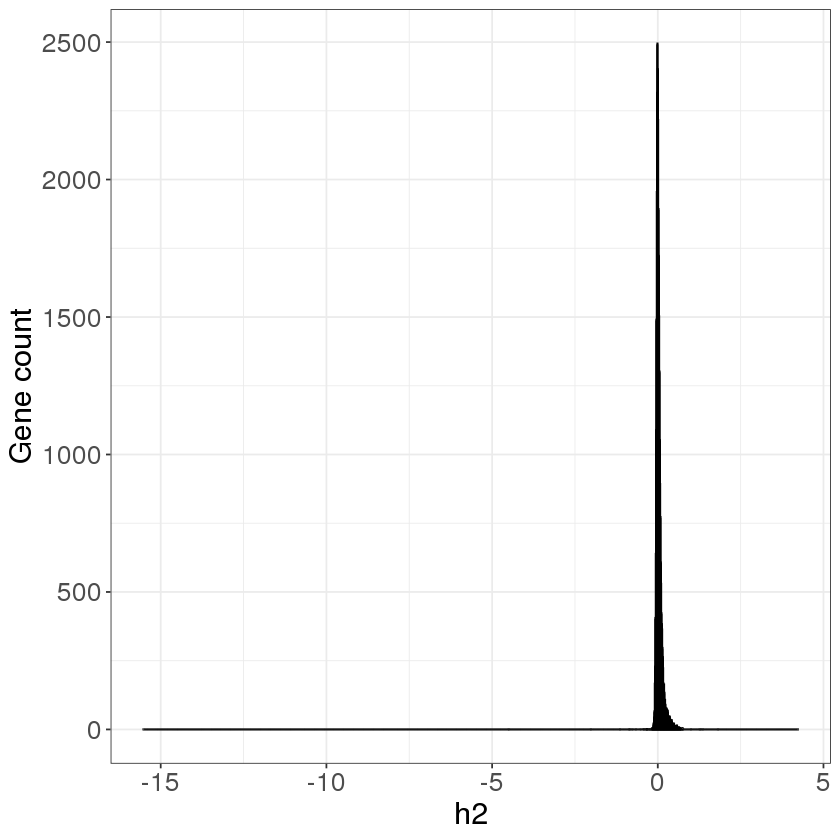

In [7]:
p <- ggplot(hsq_eur, aes(x = h2)) +
    geom_histogram(binwidth = 0.01, color = "black", fill = "white") +
    theme_bw() +
    labs(x = "h2", y = "Gene count") +
    theme(axis.text = element_text(size=16),
          axis.title = element_text(size=18))
p

In [8]:
# sig pval, positive h2 gene list
sig_eur <- hsq_eur %>% filter(pval < .05, h2 > 0) %>% select(gene)
sig_eur_rn <- hsq_eur_rn %>% filter(pval < .05, h2 > 0) %>% select(gene)
sig_amr <- hsq_amr %>% filter(pval < .05, h2 > 0) %>% select(gene)
sig_amr_rn <- hsq_amr_rn %>% filter(pval < .05, h2 > 0) %>% select(gene)
sig_afr <- hsq_afr %>% filter(pval < .05, h2 > 0) %>% select(gene)
sig_afr_rn <- hsq_afr_rn %>% filter(pval < .05, h2 > 0) %>% select(gene)

In [9]:
hsq_eur_sig <- hsq_eur %>% filter(gene %in% sig_eur$gene)
hsq_eur_rn_sig <- hsq_eur_rn %>% filter(gene %in% sig_eur_rn$gene)
hsq_amr_sig <- hsq_amr %>% filter(gene %in% sig_amr$gene)
hsq_amr_rn_sig <- hsq_amr_rn %>% filter(gene %in% sig_amr_rn$gene)
hsq_afr_sig <- hsq_afr %>% filter(gene %in% sig_afr$gene)
hsq_afr_rn_sig <- hsq_afr_rn %>% filter(gene %in% sig_afr_rn$gene)

In [19]:
dim(hsq_afr_sig)

[1] 3252    4

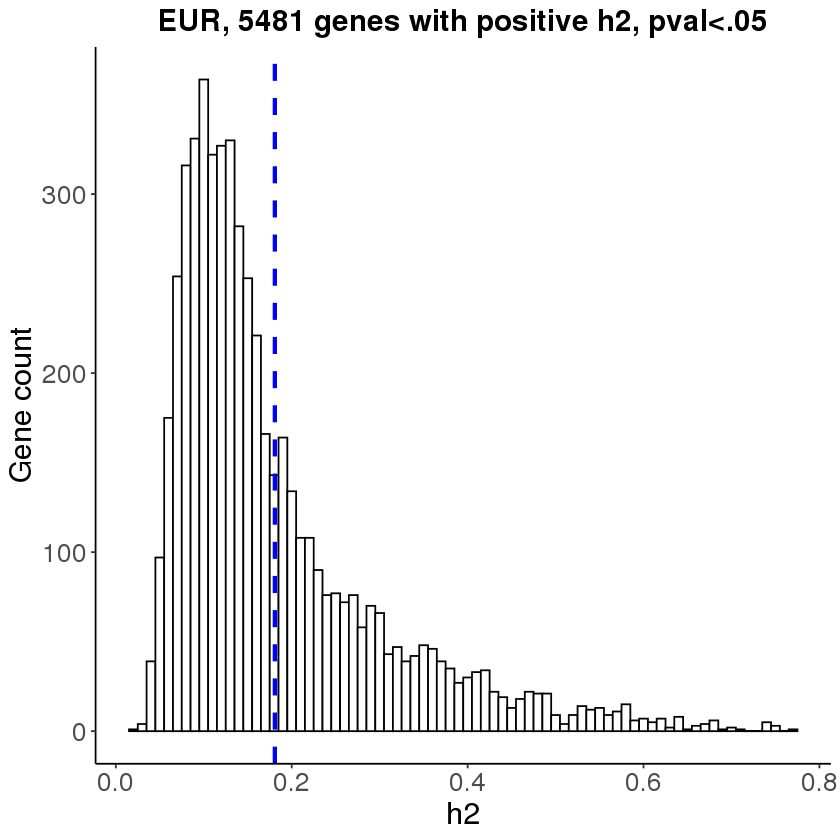

In [16]:
p1 <- ggplot(hsq_eur_sig, aes(x = h2)) +
    geom_histogram(binwidth = 0.01, color = "black", fill = "white") +
    theme_classic() +
    labs(x = "h2", y = "Gene count", title = "EUR, 5481 genes with positive h2, pval<.05") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold", hjust = .5)) +
    geom_vline(xintercept = mean(hsq_eur_sig$h2), linetype = "dashed", color = "blue", size = 1.2)
p1

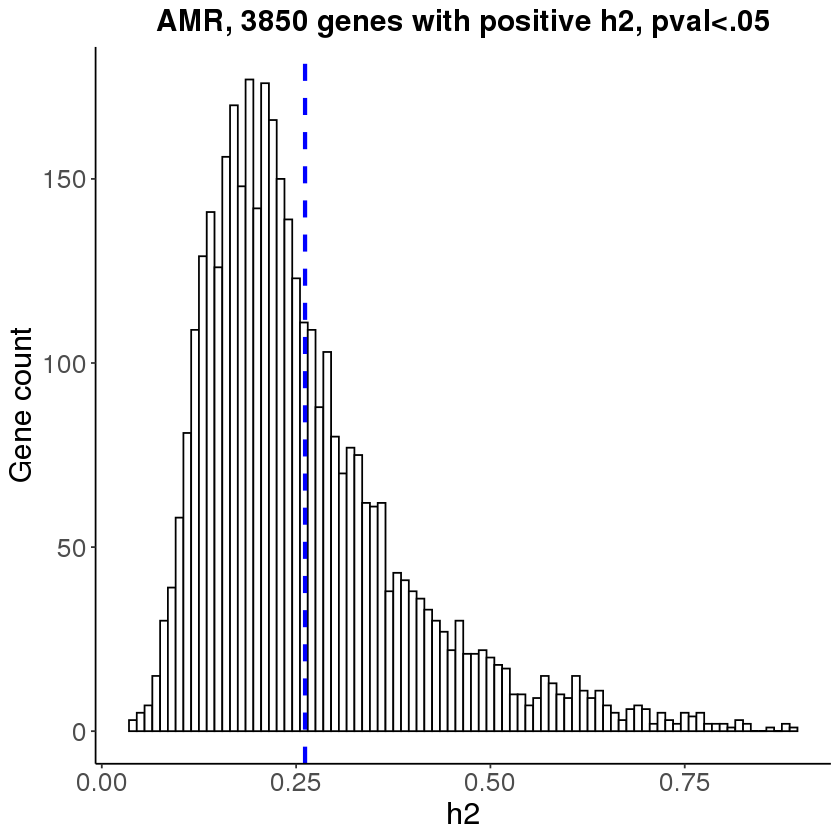

In [18]:
p2 <- ggplot(hsq_amr_sig, aes(x = h2)) +
    geom_histogram(binwidth = 0.01, color = "black", fill = "white") +
    theme_classic() +
    labs(x = "h2", y = "Gene count", title = "AMR, 3850 genes with positive h2, pval<.05") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold", hjust = .5)) +
    geom_vline(xintercept = mean(hsq_amr_sig$h2), linetype = "dashed", color = "blue", size = 1.2)
p2

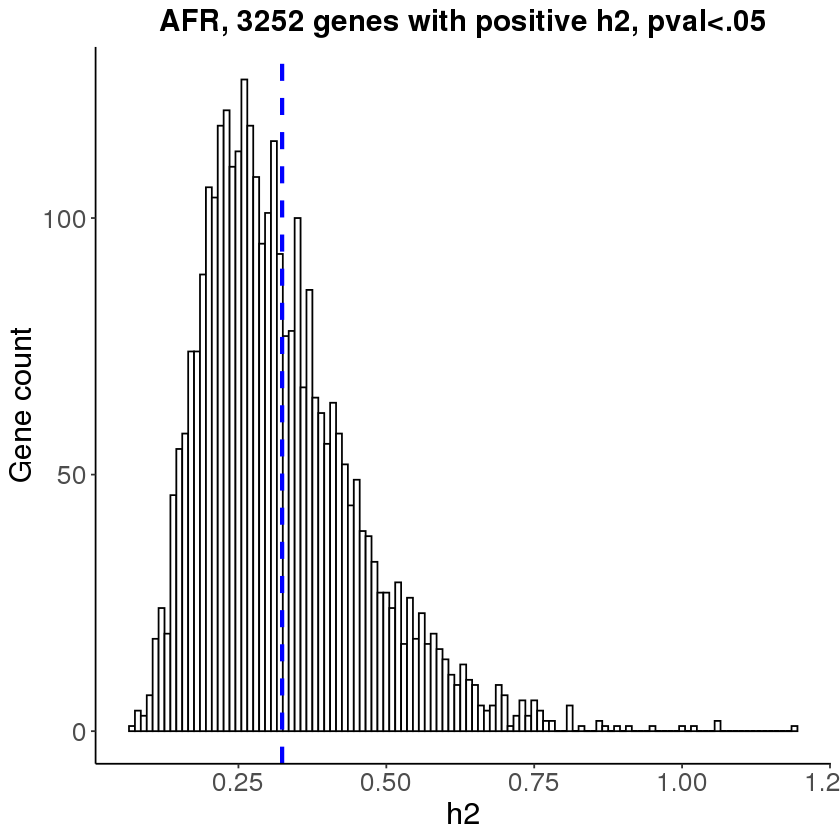

In [20]:
p3 <- ggplot(hsq_afr_sig, aes(x = h2)) +
    geom_histogram(binwidth = 0.01, color = "black", fill = "white") +
    theme_classic() +
    labs(x = "h2", y = "Gene count", title = "AFR, 3252 genes with positive h2, pval<.05") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold", hjust = .5)) +
    geom_vline(xintercept = mean(hsq_afr_sig$h2), linetype = "dashed", color = "blue", size = 1.2)
p3

In [25]:
dim(hsq_eur_rn_sig)
dim(hsq_amr_rn_sig)
dim(hsq_afr_rn_sig)

[1] 5490    4

[1] 3661    4

[1] 3244    4

In [28]:
p4 <- ggplot(hsq_eur_rn_sig, aes(x = h2)) +
    geom_histogram(binwidth = 0.01, color = "black", fill = "white") +
    theme_classic() +
    labs(x = "h2", y = "Gene count", title = "EUR, 5490 genes with positive h2, pval<.05",
         subtitle = "Rank normalized") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold", hjust = .5),
          plot.subtitle = element_text(size = 16, hjust = .5)) +
    geom_vline(xintercept = mean(hsq_eur_rn_sig$h2), linetype = "dashed", color = "blue", size = 1.2)

p5 <- ggplot(hsq_amr_rn_sig, aes(x = h2)) +
    geom_histogram(binwidth = 0.01, color = "black", fill = "white") +
    theme_classic() +
    labs(x = "h2", y = "Gene count", title = "AMR, 3661 genes with positive h2, pval<.05",
         subtitle = "Rank normalized") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold", hjust = .5),
          plot.subtitle = element_text(size = 16, hjust = .5)) +
    geom_vline(xintercept = mean(hsq_amr_rn_sig$h2), linetype = "dashed", color = "blue", size = 1.2)

p6 <- ggplot(hsq_afr_rn_sig, aes(x = h2)) +
    geom_histogram(binwidth = 0.01, color = "black", fill = "white") +
    theme_classic() +
    labs(x = "h2", y = "Gene count", title = "AFR, 3244 genes with positive h2, pval<.05",
         subtitle = "Rank normalized") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold", hjust = .5),
          plot.subtitle = element_text(size = 16, hjust = .5)) +
    geom_vline(xintercept = mean(hsq_afr_rn_sig$h2), linetype = "dashed", color = "blue", size = 1.2)

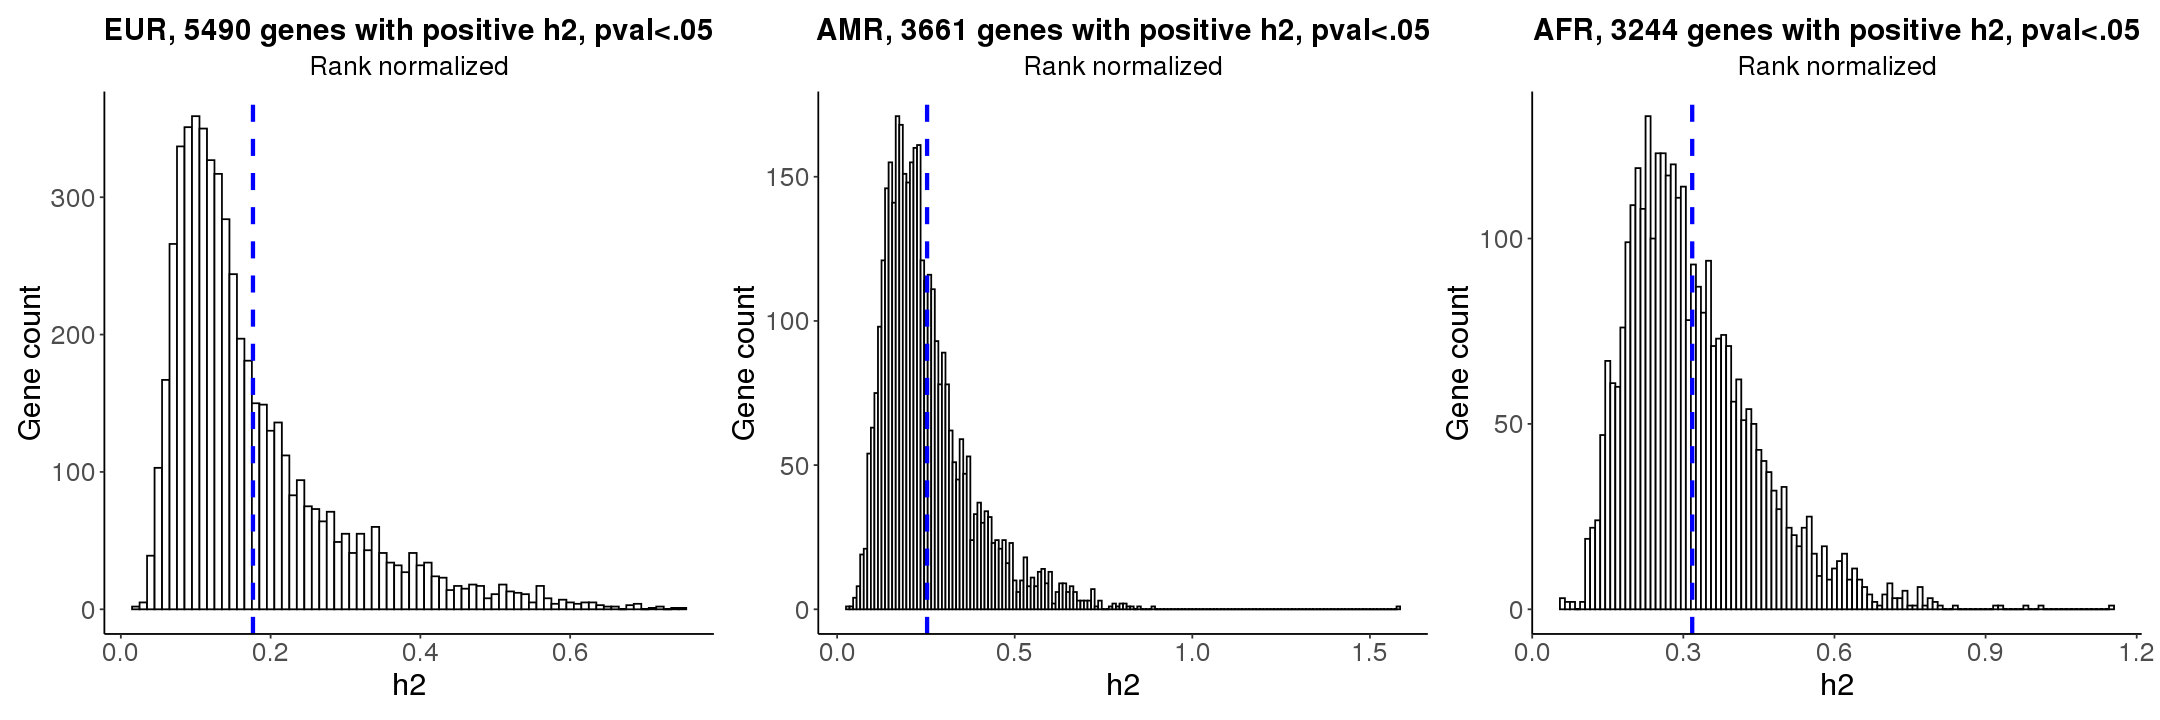

In [29]:
p7 <- p4 + p5 + p6 +
    plot_layout(ncol = 3) 
#     plot_annotation(tag_level = 'A') &
#         theme(plot.tag = element_text(size = 18, face = "bold"))
p7

In [30]:
ggsave("figures/gcta_h2g.png", p, height = 6, width = 18)
ggsave("figures/gcta_h2g_rn.png", p7, height = 6, width = 18)

## 3: Association
Adapted from https://github.com/opain/TWAS-plotter/blob/master/TWAS-plotter.V1.0.r

**ALL, rank normalized, PGC3v3 SCZ (final), with and without LDREF**
- no LDREF: **114 genes**; 89 genes with nominal perm pv < 0.05
- LDREF: **199 genes**, all no_LDREF genes are significant; 154 genes with nominal perm pv < 0.05
- 76 out of 122 genes with PGC3v2 GWAS are repliated in final LDREF results
- note FUSION output somehow has P0 and P1 in bad format, here use TSS from pos file
- checked that for significant genes, ENSG and ID are uniquely matched
- **99 out of 199** genes remain significant after conditional analysis
- 18 shared gene names with Walker 2019
- xx with PEC
- 33/199, 13/99 genes supported by eCAVIAR bulk eQTL results

In [3]:
pos <- fread("results/gene_all_LDREF_rn/gene_all.pos", data.table = F)
dat_ldref <- fread("results/gene_all_LDREF_rn/assoc/PGC3_SCZ_wave3.european.autosome.public.v3/1000perm.all.chr", data.table = F)
dim(dat_ldref)
dat_ldref <- dat_ldref %>% filter(!is.na(TWAS.P))
dim(dat_ldref)

dat_ldref <- dat_ldref %>% 
    mutate(WGT = basename(FILE))
length(unique(dat_ldref$WGT))
length(unique(dat_ldref$ID))

dat_ldref <- dat_ldref %>% left_join(pos, by = "WGT")
dat_ldref <- dat_ldref %>% select(c(30, 29, 31:34, 7:28))
colnames(dat_ldref)[1] <- "PANEL"
colnames(dat_ldref)[3] <- "ID"
colnames(dat_ldref)[4] <- "CHR"
colnames(dat_ldref)[5] <- "P0"
colnames(dat_ldref)[6] <- "P1"

dat_ldref <- dat_ldref[order(dat_ldref$CHR, dat_ldref$P0), ]
sig_ldref <- dat_ldref %>% filter(TWAS.P < 0.05/nrow(dat_ldref))
dim(sig_ldref)
length(unique(sig_ldref$ID))
length(unique(sig_ldref$WGT))

[1] 7189   28

[1] 7061   28

[1] 7061

[1] 7047

[1] 199  28

[1] 199

[1] 199

In [56]:
write.table(sig_ldref, "results/gene_all_LDREF_rn/assoc/PGC3_SCZ_wave3.european.autosome.public.v3/1000perm.all.sig.txt", col.names = T, row.names = F, quote = F, sep = "\t")

In [6]:
cond <- read.table("results/gene_all_LDREF_rn/assoc/PGC3_SCZ_wave3.european.autosome.public.v3/cond.sig.dat", header = T)

In [7]:
cond <- cond %>% mutate(FILE = basename(FILE))

In [9]:
dat <- dat_ldref

ticks <- NULL
lastbase <- 0
dat$pos <- NA

for (i in unique(dat$CHR)) {
  if (i==1) {
    dat[dat$CHR==i, ]$pos <- dat[dat$CHR==i, ]$P0
  }	else {
    lastbase <- lastbase + tail(subset(dat,CHR==i-1)$P0, 1)
    dat[dat$CHR==i, ]$pos <- dat[dat$CHR==i, ]$P0 + lastbase
  }
  ticks <- c(ticks, dat[dat$CHR==i, ]$pos[floor(length(dat[dat$CHR==i, ]$pos)/2)+1])
}
ticklim <- c(min(dat$pos), max(dat$pos))


sig <- dat %>% filter(TWAS.P < 0.05/nrow(dat))
nrow(sig)


# for the significant genes, how many have perm pv < 0.05 (nominal) 
sum(sig$PERM.PV < 0.05)
sum(sig$PERM.PV < 0.05/nrow(sig))


dat$color_group <- ifelse(dat$CHR%%2 == 1, 1, 2)
for (i in 1:nrow(dat)) {
    if (dat[i,'WGT'] %in% sig$WGT) {
        dat[i,'color_group'] <- 3
    }
    if (dat[i,'WGT'] %in% cond$FILE) {
        dat[i,'color_group'] <- 4
    }
}
table(dat$color_group)

[1] 199

[1] 154

[1] 24


   1    2    3    4 
3787 3075  100   99 

In [30]:
# sig$color_group <- "no"
# for (i in 1:nrow(sig)) {
#     if(sig[i,'WGT'] %in% cond$FILE) {
#         sig[i,'color_group'] <- "yes"
#     }
# }

In [31]:
# # chr_labs <- as.character(unique(dat$CHR))
# chr_labs <- c(1:18, '', 20, '', 22)
# ylimit <- max(abs(dat$TWAS.Z)) + 1
# # colors <- c("1" = "#ABDDDE", "2" = "#00AAB3", "3" = "#F21A00")
# colors <- c("1" = "gray35", "2" = "gray72", "3" = "orange", "4" = "#F21A00", "yes" = "#F21A00", "no" = "black")

# options(repr.plot.height = 6, repr.plot.width = 15)

# ggplot(dat, aes(x = pos, y = TWAS.Z, colour = as.factor(color_group))) +
#   geom_point(size = 0.8) +
#   scale_x_continuous(name = "Position", labels = chr_labs, breaks = ticks) +
#   scale_y_continuous(name = "TWAS Z score", limits = c(-ylimit, ylimit)) +
#   scale_colour_manual(values = colors) +
#   geom_text_repel(data = sig, aes(x = pos, y = TWAS.Z, label = ID), 
#                   nudge_y = ifelse(sig$TWAS.Z > 0, .5, -.5), size = 3, force = 5, segment.alpha = 0.25,
#                   max.overlaps = Inf) +
#   theme_classic() +
#   labs(colour = "") +
#   theme(axis.text = element_text(size = 14),
#         axis.title = element_text(size = 18),
#         plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
#         legend.position = "none")

In [32]:
# ggsave("figures/all.pdf", height = 6, width = 15)

In [35]:
gtf <- fread("~/project-gandalm/isoform_twas/salmon/gencode.v33lift37.annotation.gene.info.tsv", data.table = F)

In [38]:
dat$ensg <- gsub('.wgt.RDat', '', dat$WGT)

In [40]:
dat <- dat %>% left_join(gtf, by = "ensg")

In [42]:
colnames(dat)

[1] "PANEL"        "WGT"          "ID"           "CHR"          "P0"          
 [6] "P1"           "HSQ"          "BEST.GWAS.ID" "BEST.GWAS.Z"  "EQTL.ID"     
[11] "EQTL.R2"      "EQTL.Z"       "EQTL.GWAS.Z"  "NSNP"         "NWGT"        
[16] "MODEL"        "MODELCV.R2"   "MODELCV.PV"   "TWAS.Z"       "TWAS.P"      
[21] "COLOC.PP0"    "COLOC.PP1"    "COLOC.PP2"    "COLOC.PP3"    "COLOC.PP4"   
[26] "PERM.PV"      "PERM.N"       "PERM.ANL_PV"  "pos"          "color_group" 
[31] "ensg"         "V1"           "V2"           "V3"           "V4"          
[36] "V5"           "V6"           "V7"           "V8"           "V9"          
[41] "version"      "V11"          "V12"

In [43]:
dat <- dat %>% select(-c(V1, V2, V3, V4, V5, V6, V7, V8, V9, version, V12))

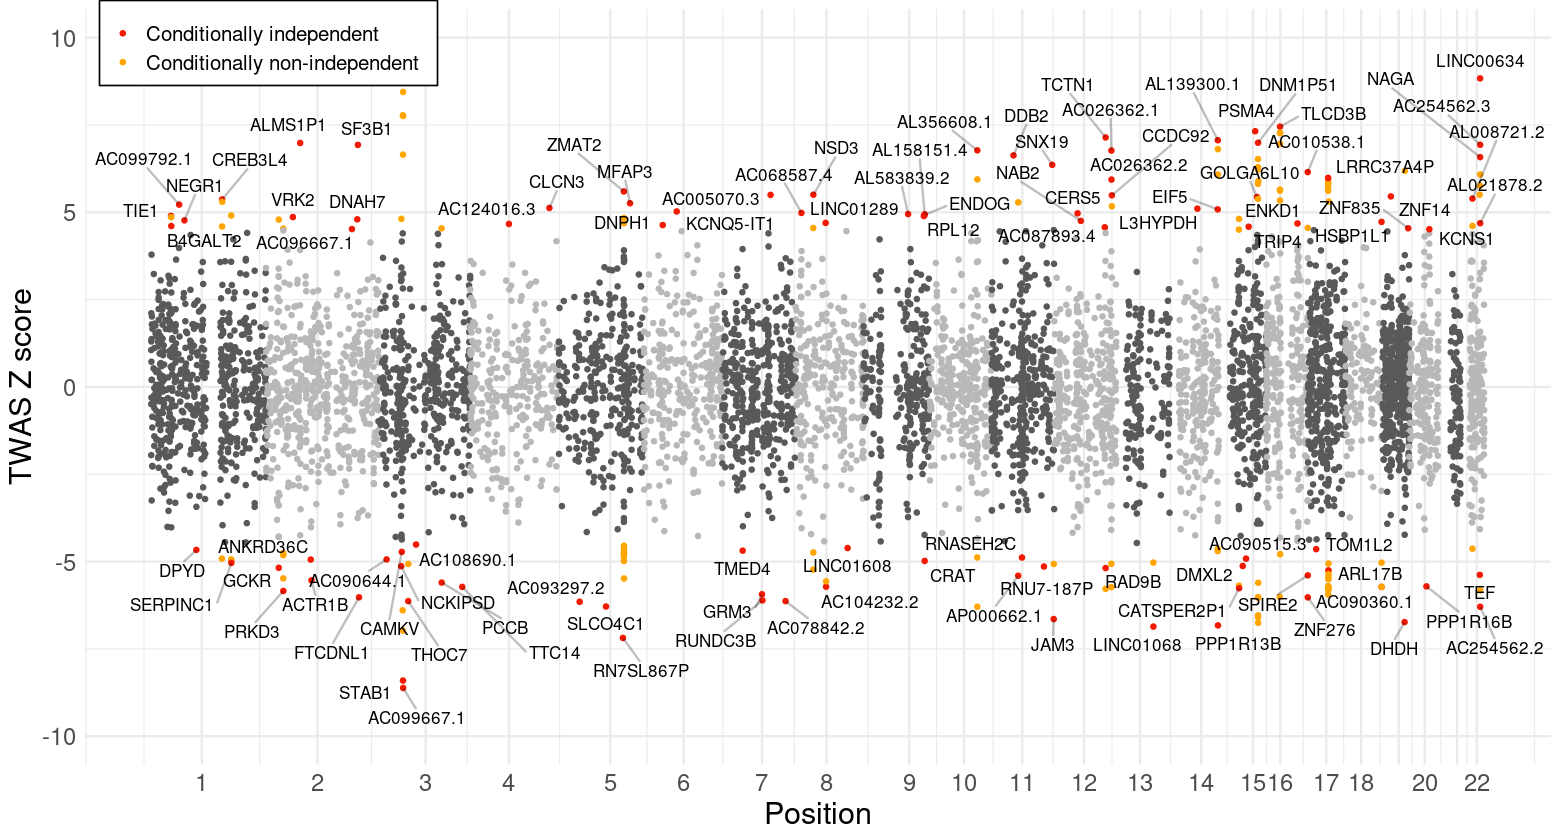

In [44]:
# chr_labs <- as.character(unique(dat$CHR))
chr_labs <- c(1:18, '', 20, '', 22)
ylimit <- max(abs(dat$TWAS.Z)) + 1
# colors <- c("1" = "#ABDDDE", "2" = "#00AAB3", "3" = "#F21A00")
dat$color_group[dat$color_group == "3"] <- "Conditionally non-independent"
dat$color_group[dat$color_group == "4"] <- "Conditionally independent"
colors <- c("1" = "gray35", "2" = "gray72", 
            "Conditionally non-independent" = "orange", "Conditionally independent" = "#F21A00")

dat$color_group <- factor(dat$color_group, levels = c("1", "2", "Conditionally independent", "Conditionally non-independent"))


options(repr.plot.height = 7, repr.plot.width = 13)

ggplot(dat, aes(x = pos, y = TWAS.Z, colour = color_group)) +
  geom_point(size = 0.8) +
  scale_x_continuous(name = "Position", labels = chr_labs, breaks = ticks) +
  scale_y_continuous(name = "TWAS Z score", limits = c(-ylimit, ylimit)) +
  scale_colour_manual(values = colors, breaks = c("Conditionally independent", "Conditionally non-independent")) +
  geom_text_repel(data = dat[dat$color_group == "Conditionally independent",], 
                  aes(x = pos, y = TWAS.Z, label = ID), 
                  color = "black",
                  nudge_y = ifelse(dat[dat$color_group == "Conditionally independent",'TWAS.Z'] > 0, .5, -.5), 
                  size = 3.5, force = 5, segment.alpha = 0.25,
                  max.overlaps = Inf) +
  theme_minimal() +
  labs(colour = "") +
  theme(axis.text = element_text(size = 14),
        axis.title = element_text(size = 18),
#         plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        legend.text = element_text(size = 12),
        legend.position = c(0.01, 0.955),
        legend.background = element_blank(),
        legend.box.background = element_rect(colour = "black"),
        legend.box = "vertical",
        legend.justification = "left",
        legend.direction = "vertical",
        legend.title = element_blank())

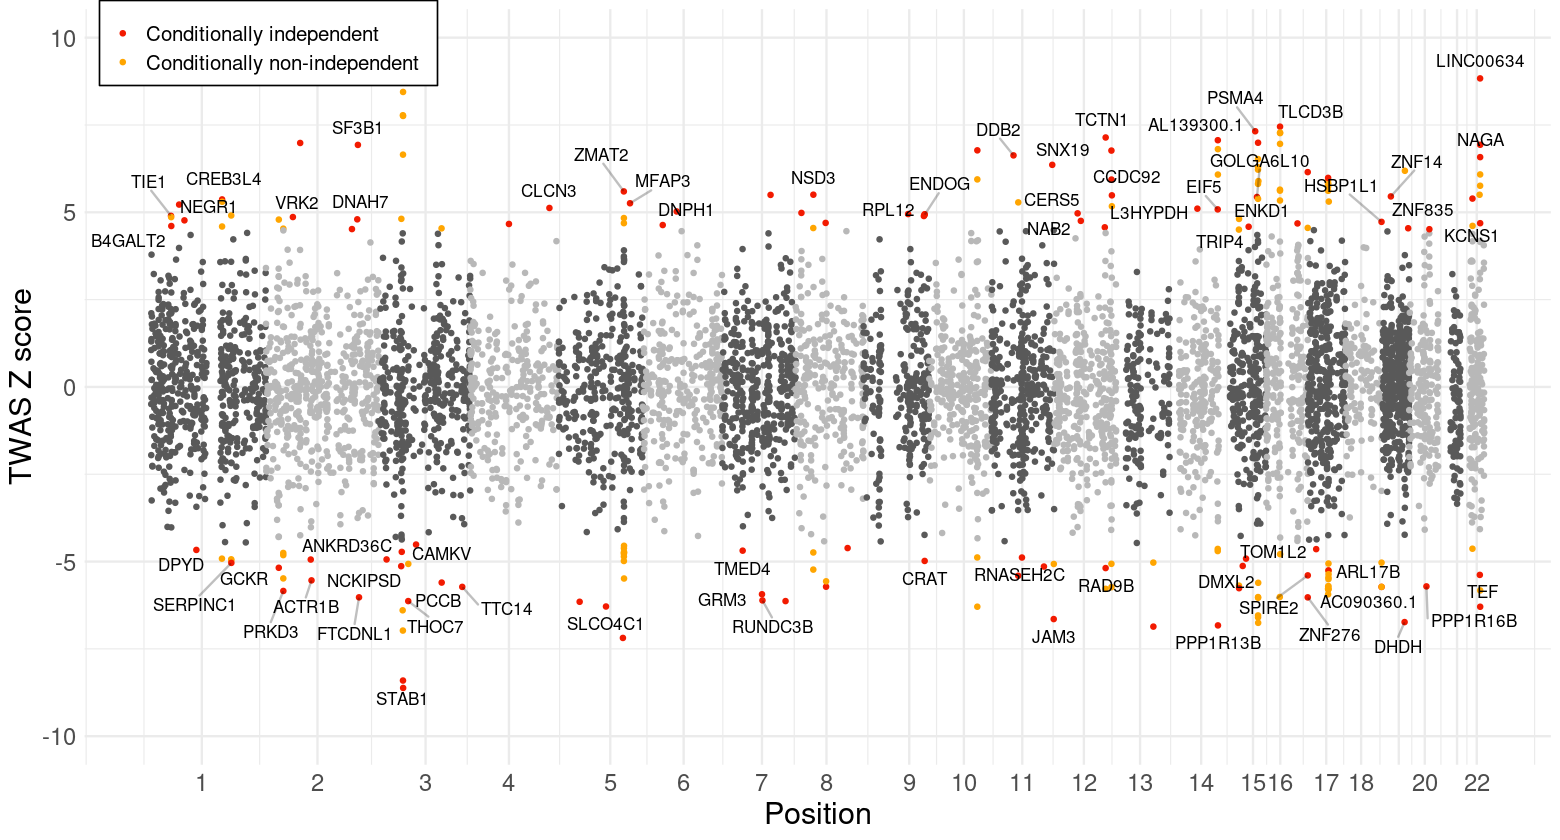

In [47]:
# chr_labs <- as.character(unique(dat$CHR))
chr_labs <- c(1:18, '', 20, '', 22)
ylimit <- max(abs(dat$TWAS.Z)) + 1
# colors <- c("1" = "#ABDDDE", "2" = "#00AAB3", "3" = "#F21A00")
dat$color_group[dat$color_group == "3"] <- "Conditionally non-independent"
dat$color_group[dat$color_group == "4"] <- "Conditionally independent"
colors <- c("1" = "gray35", "2" = "gray72", 
            "Conditionally non-independent" = "orange", "Conditionally independent" = "#F21A00")

dat$color_group <- factor(dat$color_group, levels = c("1", "2", "Conditionally independent", "Conditionally non-independent"))


options(repr.plot.height = 7, repr.plot.width = 13)

ggplot(dat, aes(x = pos, y = TWAS.Z, colour = color_group)) +
  geom_point(size = 0.8) +
  scale_x_continuous(name = "Position", labels = chr_labs, breaks = ticks) +
  scale_y_continuous(name = "TWAS Z score", limits = c(-ylimit, ylimit)) +
  scale_colour_manual(values = colors, breaks = c("Conditionally independent", "Conditionally non-independent")) +
  geom_text_repel(data = dat %>% filter(color_group == "Conditionally independent", V11 == "protein_coding"),
                  aes(x = pos, y = TWAS.Z, label = ID), 
                  color = "black",
                  nudge_y = ifelse(dat[dat$color_group == "Conditionally independent" & dat$V11 == "protein_coding",
                                       'TWAS.Z'] > 0, .5, -.5), 
                  size = 3.5, force = 5, segment.alpha = 0.25,
                  max.overlaps = Inf) +
  theme_minimal() +
  labs(colour = "") +
  theme(axis.text = element_text(size = 14),
        axis.title = element_text(size = 18),
#         plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        legend.text = element_text(size = 12),
        legend.position = c(0.01, 0.955),
        legend.background = element_blank(),
        legend.box.background = element_rect(colour = "black"),
        legend.box = "vertical",
        legend.justification = "left",
        legend.direction = "vertical",
        legend.title = element_blank())

In [33]:
ggsave("figures/all.pdf", height = 7, width = 13)

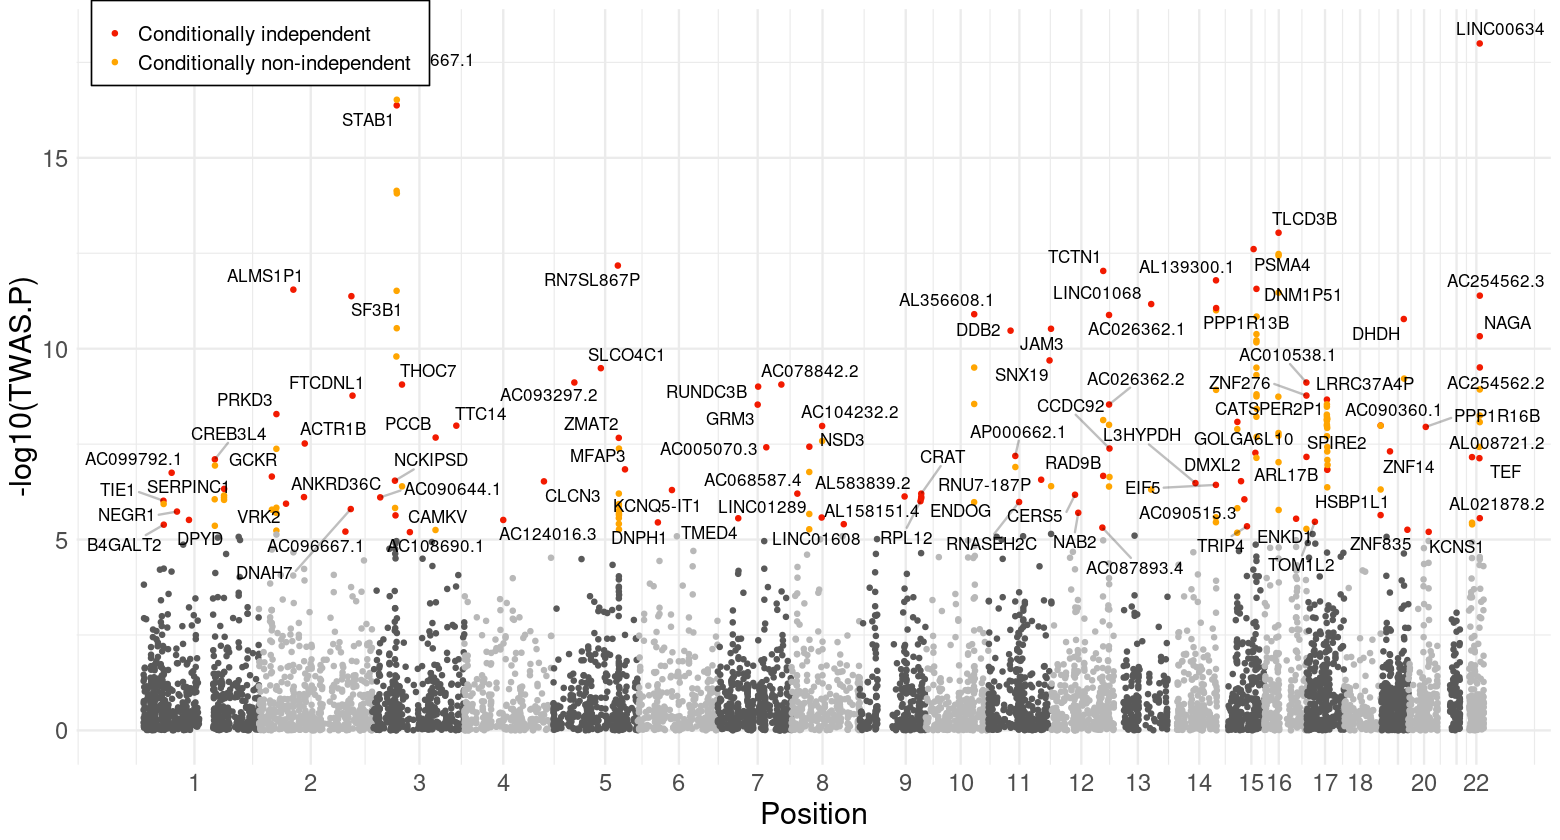

In [48]:
ggplot(dat, aes(x = pos, y = -log10(TWAS.P), colour = color_group)) +
  geom_point(size = 0.8) +
  scale_x_continuous(name = "Position", labels = chr_labs, breaks = ticks) +
  scale_y_continuous(name = "-log10(TWAS.P)") +
  scale_colour_manual(values = colors, breaks = c("Conditionally independent", "Conditionally non-independent")) +
  geom_text_repel(data = dat[dat$color_group == "Conditionally independent",], 
                  aes(x = pos, y = -log10(TWAS.P), label = ID), 
                  color = "black",
#                   nudge_y = ifelse(dat[dat$color_group == "Conditionally independent",'TWAS.Z'] > 0, .5, -.5), 
                  size = 3.5, force = 5, segment.alpha = 0.25,
                  max.overlaps = Inf) +
  theme_minimal() +
  labs(colour = "") +
  theme(axis.text = element_text(size = 14),
        axis.title = element_text(size = 18),
#         plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        legend.text = element_text(size = 12),
        legend.position = c(0.01, 0.955),
        legend.background = element_blank(),
        legend.box.background = element_rect(colour = "black"),
        legend.box = "vertical",
        legend.justification = "left",
        legend.direction = "vertical",
        legend.title = element_blank())

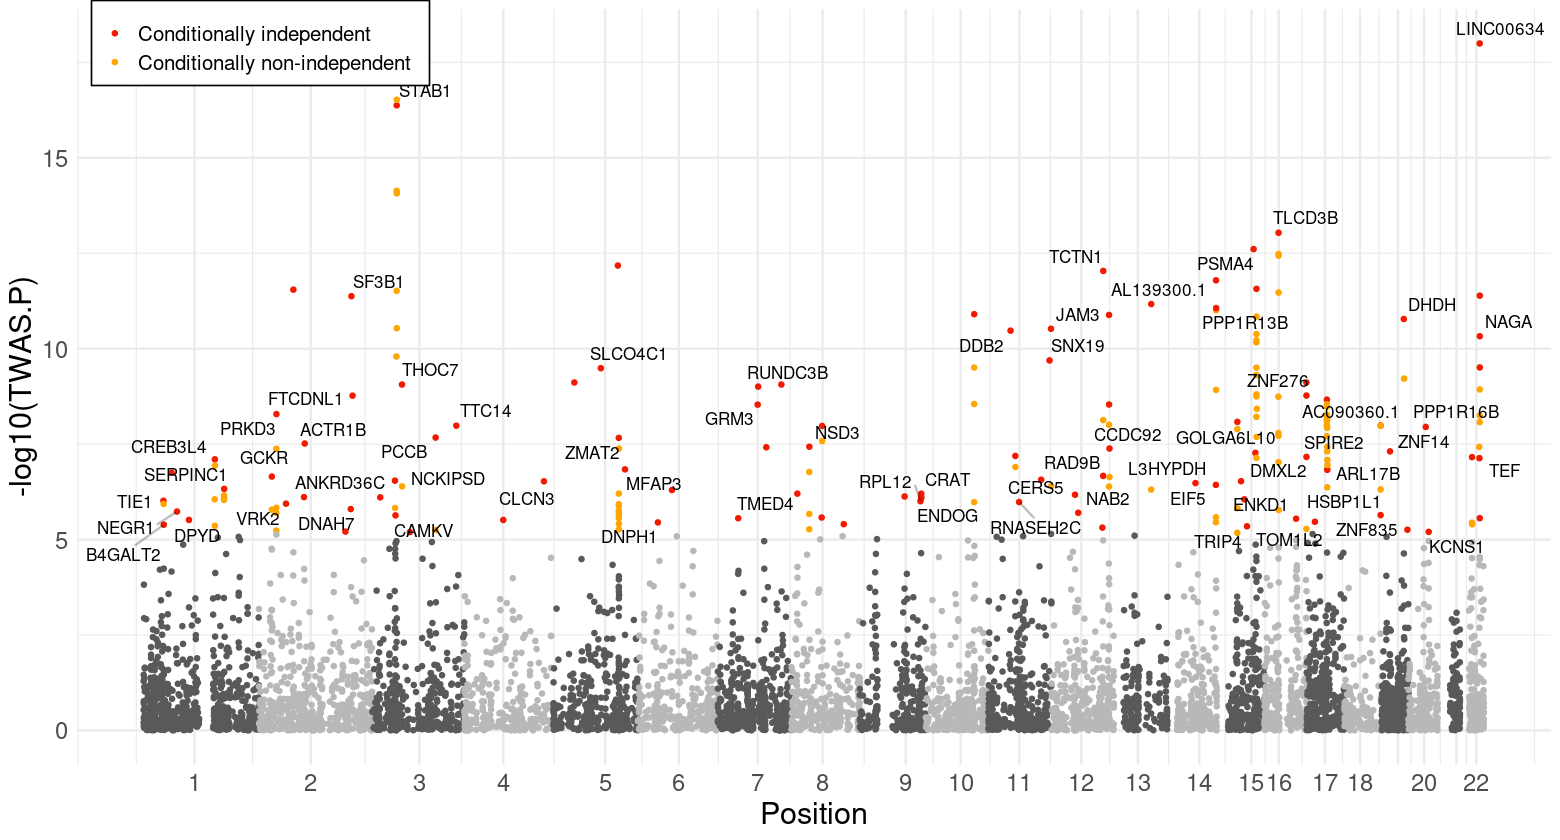

In [49]:
ggplot(dat, aes(x = pos, y = -log10(TWAS.P), colour = color_group)) +
  geom_point(size = 0.8) +
  scale_x_continuous(name = "Position", labels = chr_labs, breaks = ticks) +
  scale_y_continuous(name = "-log10(TWAS.P)") +
  scale_colour_manual(values = colors, breaks = c("Conditionally independent", "Conditionally non-independent")) +
  geom_text_repel(data = dat %>% filter(color_group == "Conditionally independent", V11 == "protein_coding"),
                  aes(x = pos, y = -log10(TWAS.P), label = ID), 
                  color = "black",
#                   nudge_y = ifelse(dat[dat$color_group == "Conditionally independent",'TWAS.Z'] > 0, .5, -.5), 
                  size = 3.5, force = 5, segment.alpha = 0.25,
                  max.overlaps = Inf) +
  theme_minimal() +
  labs(colour = "") +
  theme(axis.text = element_text(size = 14),
        axis.title = element_text(size = 18),
#         plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        legend.text = element_text(size = 12),
        legend.position = c(0.01, 0.955),
        legend.background = element_blank(),
        legend.box.background = element_rect(colour = "black"),
        legend.box = "vertical",
        legend.justification = "left",
        legend.direction = "vertical",
        legend.title = element_blank())

In [52]:
coloc <- read.table("../colocal/results_eqtl/PGC3_SCZ_wave3.european.autosome.public.v3/CLPP_sig_info.txt", header=T)
head(coloc)

,SNP_ID,Prob_in_pCausalSet,CLPP,locus,gene,gene_CHR,gene_START,gene_END,gene_type,gene_name
,<chr>,<dbl>,<dbl>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
1,rs1553178,0.558806,0.0173703,2,ENSG00000111011,chr12,122988001,123011547,protein_coding,RSRC2
2,rs7975763,0.566029,0.0189933,2,ENSG00000150967,chr12,123405498,123466196,protein_coding,ABCB9
3,rs1716183,0.401653,0.0113491,2,ENSG00000256028,chr12,123459867,123467454,lncRNA,AC026362.1
4,rs192569,0.581400,0.2692940,3,ENSG00000166272,chr10,104503705,104594273,protein_coding,WBP1L
5,rs619824,0.418590,0.1938830,3,ENSG00000166272,chr10,104503705,104594273,protein_coding,WBP1L
6,rs7085104,0.469456,0.0265408,3,ENSG00000214435,chr10,104629227,104661656,protein_coding,AS3MT


In [54]:
sig$gene_id <- gsub(".wgt.RDat", "", sig$WGT)
sum(sig$gene_id %in% coloc$gene)

[1] 33

In [55]:
dim(sig)

[1] 199  30

In [57]:
cond$gene_id <- gsub(".wgt.RDat", "", cond$FILE)
sum(cond$gene_id %in% coloc$gene)

[1] 13

In [66]:
cond[cond$gene_id %in% coloc$gene, 'ID']

[1] "SNX19"      "TCTN1"      "AC026362.1" "CATSPER2P1" "DHDH"      
 [6] "PRKD3"      "ACTR1B"     "CAMKV"      "STAB1"      "AC099667.1"
[11] "AC093297.2" "ZMAT2"      "RPL12"

**Compare with Walker et al. 2019**
- different SCZ GWAS, gencode, etc.
- 18 shared gene names

In [58]:
rw <- read.table("results/RW_TWAS.tsv")
head(rw)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,SCZ,prenatal,ST3GAL3,1,44171495,44396831,rs11210892,6.742,5.93,2.95e-09,0.000,0.000,0.881,0.027,0.092
2,SCZ,prenatal,PMVK,1,154897210,154909467,rs10796933,-4.921,-5.73,9.79e-09,0.218,0.006,0.557,0.016,0.202
3,SCZ,prenatal,KANSL3,2,97258907,97308524,rs2271893,-4.250,-4.39,1.15e-05,0.936,0.009,0.051,0.001,0.003
4,SCZ,prenatal,NRBP1,2,27650657,27665126,rs4233716,-5.040,-4.89,9.99e-07,0.158,0.003,0.775,0.016,0.048
5,SCZ,prenatal,SF3B1,2,198254508,198299815,rs699319,7.110,6.29,3.08e-10,0.000,0.000,0.822,0.021,0.157
6,SCZ,prenatal,PLCL1,2,198669426,199437305,rs699319,7.110,-4.86,1.18e-06,0.000,0.000,0.933,0.017,0.051


In [60]:
dim(sig)

[1] 199  29

In [5]:
dim(rw)

[1] 62 15

In [7]:
sum(rw$V3 %in% sig$ID)

[1] 18

In [65]:
rw$V3[rw$V3 %in% sig$ID]

[1] "ST3GAL3"  "SF3B1"    "STAB1"    "NEK4"     "PSMD6"    "GNL3"    
 [7] "NT5DC2"   "DDHD2"    "LSM1"     "WBP1L"    "SNX19"    "JAM3"    
[13] "VPS29"    "TCTN1"    "CSPG4P11" "WBP2NL"   "SMDT1"    "NAGA"

**Trimester**
- tri1 119 genes
- tri2 90 genes
- shared 40

In [50]:
pos <- fread("results/gene_tri1_LDREF_rn/gene_all.pos", data.table = F)
dat_ldref <- fread("results/gene_tri1_LDREF_rn/assoc/PGC3_SCZ_wave3.european.autosome.public.v3/1000perm.all.chr", data.table = F)
dim(dat_ldref)
dat_ldref <- dat_ldref %>% filter(!is.na(TWAS.P))
dim(dat_ldref)

dat_ldref <- dat_ldref %>% 
    mutate(WGT = basename(FILE))
length(unique(dat_ldref$WGT))
length(unique(dat_ldref$ID))

dat_ldref <- dat_ldref %>% left_join(pos, by = "WGT")
dat_ldref <- dat_ldref %>% select(c(30, 29, 31:34, 7:28))
colnames(dat_ldref)[1] <- "PANEL"
colnames(dat_ldref)[3] <- "ID"
colnames(dat_ldref)[4] <- "CHR"
colnames(dat_ldref)[5] <- "P0"
colnames(dat_ldref)[6] <- "P1"

dat_ldref <- dat_ldref[order(dat_ldref$CHR, dat_ldref$P0), ]
sig_ldref1 <- dat_ldref %>% filter(TWAS.P < 0.05/nrow(dat_ldref))
dim(sig_ldref1)
length(unique(sig_ldref1$ID))
length(unique(sig_ldref1$WGT))

[1] 4164   28

[1] 4050   28

[1] 4050

[1] 4041

[1] 119  28

[1] 119

[1] 119

In [51]:
dim(sig_ldref1)

[1] 119  28

In [52]:
write.table(sig_ldref1, "results/gene_tri1_LDREF_rn/assoc/PGC3_SCZ_wave3.european.autosome.public.v3/1000perm.all.sig.txt", col.names = T, row.names = F, quote = F, sep = "\t")

[1] 119

[1] 89

[1] 7


   1    2    3 
2167 1764  119 

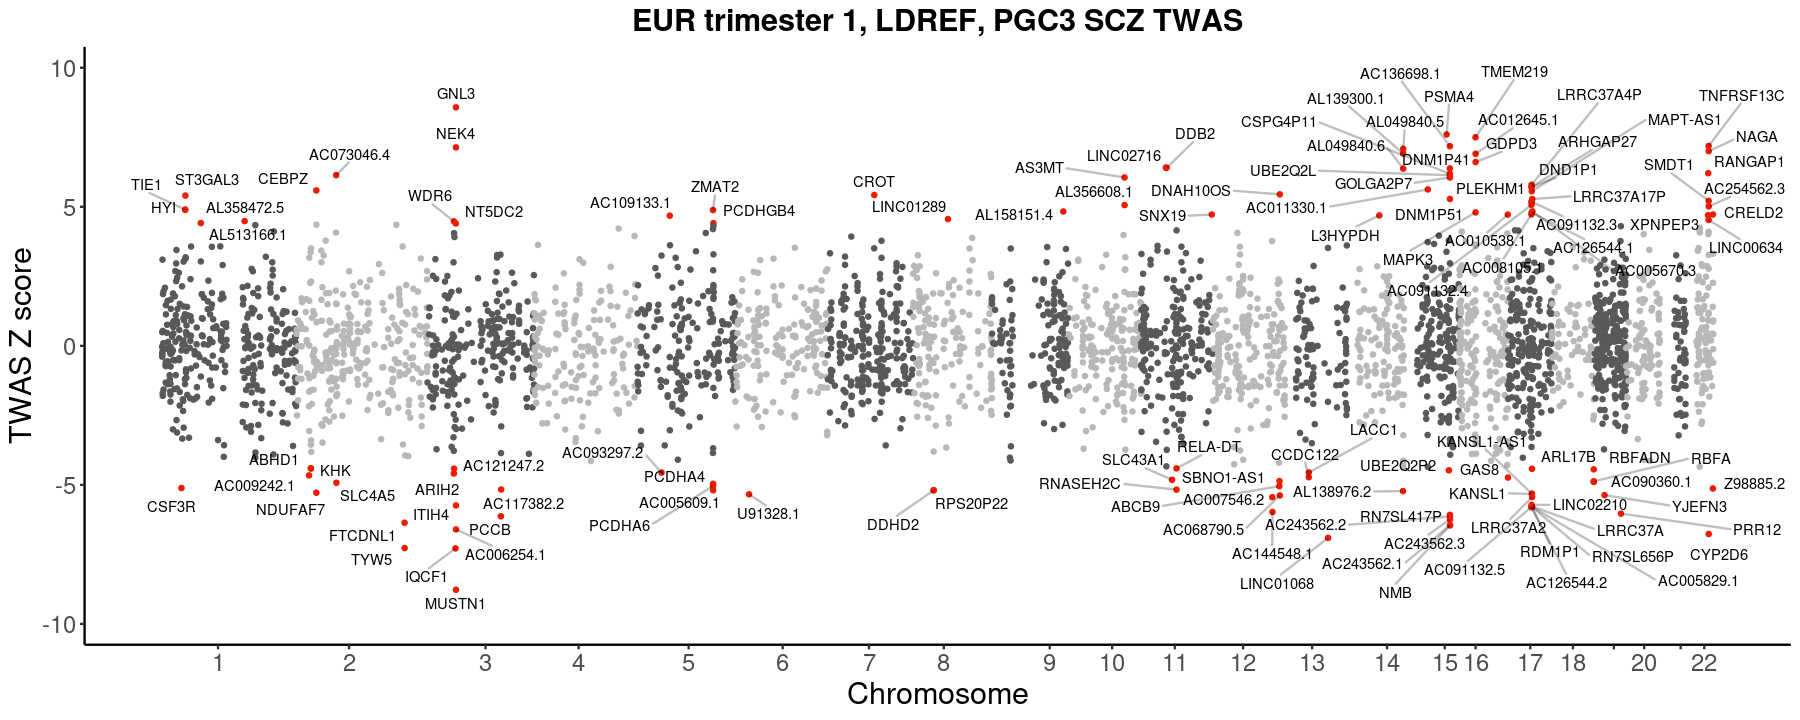

In [23]:
dat <- dat_ldref

ticks <- NULL
lastbase <- 0
dat$pos <- NA

for (i in unique(dat$CHR)) {
  if (i==1) {
    dat[dat$CHR==i, ]$pos <- dat[dat$CHR==i, ]$P0
  }	else {
    lastbase <- lastbase + tail(subset(dat,CHR==i-1)$P0, 1)
    dat[dat$CHR==i, ]$pos <- dat[dat$CHR==i, ]$P0 + lastbase
  }
  ticks <- c(ticks, dat[dat$CHR==i, ]$pos[floor(length(dat[dat$CHR==i, ]$pos)/2)+1])
}
ticklim <- c(min(dat$pos), max(dat$pos))


sig <- dat %>% filter(TWAS.P < 0.05/nrow(dat))
nrow(sig)


# for the significant genes, how many have perm pv < 0.05 (nominal) 
sum(sig$PERM.PV < 0.05)
sum(sig$PERM.PV < 0.05/nrow(sig))


dat$color_group <- ifelse(dat$CHR%%2 == 1, 1, 2)
for (i in 1:nrow(dat)) {
    if (dat[i,'WGT'] %in% sig$WGT) {
        dat[i,'color_group'] <- 3
    }
}
table(dat$color_group)


# chr_labs <- as.character(unique(dat$CHR))
chr_labs <- c(1:18, '', 20, '', 22)
ylimit <- max(abs(dat$TWAS.Z)) + 1
# colors <- c("1" = "#ABDDDE", "2" = "#00AAB3", "3" = "#F21A00")
colors <- c("1" = "gray35", "2" = "gray72", "3" = "#F21A00")

options(repr.plot.height = 6, repr.plot.width = 15)

ggplot(dat, aes(x = pos, y = TWAS.Z, colour = as.factor(color_group))) +
  geom_point(size = 0.8) +
  scale_x_continuous(name = "Chromosome", labels = chr_labs, breaks = ticks) +
  scale_y_continuous(name = "TWAS Z score", limits = c(-ylimit, ylimit)) +
  scale_colour_manual(values = colors) +
  geom_text_repel(data = sig, aes(x = pos, y = TWAS.Z, label = ID), 
                  colour = "black", 
                  nudge_y = ifelse(sig$TWAS.Z > 0, .5, -.5), size = 3, force = 5, segment.alpha = 0.25,
                  max.overlaps = Inf) +
  theme_classic() +
  labs(title = "EUR trimester 1, LDREF, PGC3 SCZ TWAS", colour = "") +
  theme(axis.text = element_text(size = 14),
        axis.title = element_text(size = 18),
        plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        legend.position = "none")

In [24]:
ggsave("figures/tri1.pdf", height = 6, width = 15)

In [55]:
pos <- fread("results/gene_tri2_LDREF_rn/gene_all.pos", data.table = F)
dat_ldref <- fread("results/gene_tri2_LDREF_rn/assoc/PGC3_SCZ_wave3.european.autosome.public.v3/1000perm.all.chr", data.table = F)
dim(dat_ldref)
dat_ldref <- dat_ldref %>% filter(!is.na(TWAS.P))
dim(dat_ldref)

dat_ldref <- dat_ldref %>% 
    mutate(WGT = basename(FILE))
length(unique(dat_ldref$WGT))
length(unique(dat_ldref$ID))

dat_ldref <- dat_ldref %>% left_join(pos, by = "WGT")
dat_ldref <- dat_ldref %>% select(c(30, 29, 31:34, 7:28))
colnames(dat_ldref)[1] <- "PANEL"
colnames(dat_ldref)[3] <- "ID"
colnames(dat_ldref)[4] <- "CHR"
colnames(dat_ldref)[5] <- "P0"
colnames(dat_ldref)[6] <- "P1"

dat_ldref <- dat_ldref[order(dat_ldref$CHR, dat_ldref$P0), ]
sig_ldref_2 <- dat_ldref %>% filter(TWAS.P < 0.05/nrow(dat_ldref))
dim(sig_ldref_2)
length(unique(sig_ldref_2$ID))
length(unique(sig_ldref_2$WGT))

[1] 2941   28

[1] 2851   28

[1] 2851

[1] 2842

[1] 90 28

[1] 90

[1] 90

In [56]:
write.table(sig_ldref_2, "results/gene_tri2_LDREF_rn/assoc/PGC3_SCZ_wave3.european.autosome.public.v3/1000perm.all.sig.txt", col.names = T, row.names = F, quote = F, sep = "\t")

[1] 90

[1] 66

[1] 8


   1    2    3 
1541 1220   90 

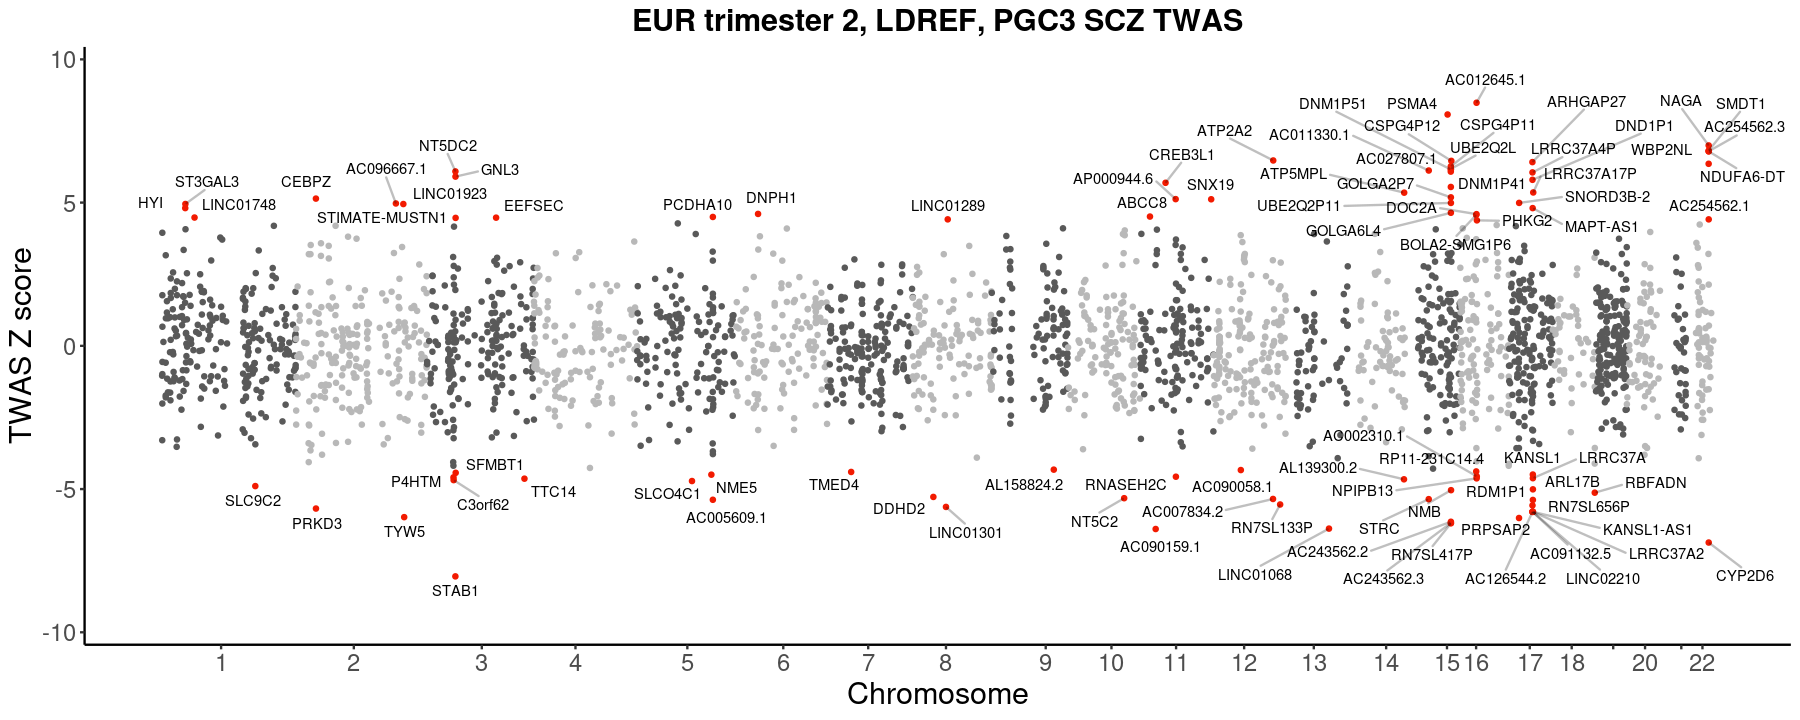

In [26]:
dat <- dat_ldref

ticks <- NULL
lastbase <- 0
dat$pos <- NA

for (i in unique(dat$CHR)) {
  if (i==1) {
    dat[dat$CHR==i, ]$pos <- dat[dat$CHR==i, ]$P0
  }	else {
    lastbase <- lastbase + tail(subset(dat,CHR==i-1)$P0, 1)
    dat[dat$CHR==i, ]$pos <- dat[dat$CHR==i, ]$P0 + lastbase
  }
  ticks <- c(ticks, dat[dat$CHR==i, ]$pos[floor(length(dat[dat$CHR==i, ]$pos)/2)+1])
}
ticklim <- c(min(dat$pos), max(dat$pos))


sig <- dat %>% filter(TWAS.P < 0.05/nrow(dat))
nrow(sig)


# for the significant genes, how many have perm pv < 0.05 (nominal) 
sum(sig$PERM.PV < 0.05)
sum(sig$PERM.PV < 0.05/nrow(sig))


dat$color_group <- ifelse(dat$CHR%%2 == 1, 1, 2)
for (i in 1:nrow(dat)) {
    if (dat[i,'WGT'] %in% sig$WGT) {
        dat[i,'color_group'] <- 3
    }
}
table(dat$color_group)


# chr_labs <- as.character(unique(dat$CHR))
chr_labs <- c(1:18, '', 20, '', 22)
ylimit <- max(abs(dat$TWAS.Z)) + 1
# colors <- c("1" = "#ABDDDE", "2" = "#00AAB3", "3" = "#F21A00")
colors <- c("1" = "gray35", "2" = "gray72", "3" = "#F21A00")

options(repr.plot.height = 6, repr.plot.width = 15)

ggplot(dat, aes(x = pos, y = TWAS.Z, colour = as.factor(color_group))) +
  geom_point(size = 0.8) +
  scale_x_continuous(name = "Chromosome", labels = chr_labs, breaks = ticks) +
  scale_y_continuous(name = "TWAS Z score", limits = c(-ylimit, ylimit)) +
  scale_colour_manual(values = colors) +
  geom_text_repel(data = sig, aes(x = pos, y = TWAS.Z, label = ID), 
                  colour = "black", 
                  nudge_y = ifelse(sig$TWAS.Z > 0, .5, -.5), size = 3, force = 5, segment.alpha = 0.25,
                  max.overlaps = Inf) +
  theme_classic() +
  labs(title = "EUR trimester 2, LDREF, PGC3 SCZ TWAS", colour = "") +
  theme(axis.text = element_text(size = 14),
        axis.title = element_text(size = 18),
        plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        legend.position = "none")

In [27]:
ggsave("figures/tri2.pdf", height = 6, width = 15)

In [14]:
# n1: sig_ldref ALL 199
# n2: sig_ldref1, tri1, 119
# n3: sig_ldref2, tri2, 90
# n12, 72
sum(unique(sig_ldref1$WGT) %in% unique(sig_ldref$WGT))
sum(unique(sig_ldref1$ID) %in% unique(sig_ldref$ID))
# n23, 44
sum(unique(sig_ldref1$WGT) %in% unique(sig_ldref_2$WGT))
sum(unique(sig_ldref1$ID) %in% unique(sig_ldref_2$ID))
# n13, 55
sum(unique(sig_ldref_2$WGT) %in% unique(sig_ldref$WGT))
sum(unique(sig_ldref_2$ID) %in% unique(sig_ldref$ID))
# n123, 41
length(Reduce(intersect, list(unique(sig_ldref$WGT),unique(sig_ldref1$WGT), unique(sig_ldref_2$WGT))))
length(Reduce(intersect, list(unique(sig_ldref$ID),unique(sig_ldref1$ID), unique(sig_ldref_2$ID))))

[1] 72

[1] 72

[1] 44

[1] 44

[1] 55

[1] 55

[1] 41

[1] 41

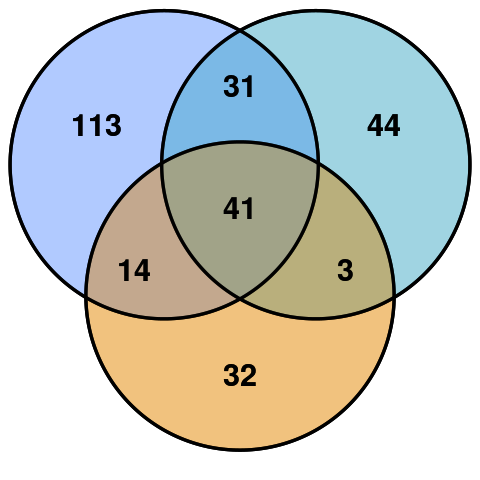

In [16]:
options(repr.plot.height = 4, repr.plot.width = 4)
myCol <- c("#6699FF", "#46ACC8", "#E58601")
# area1, area2, area3, n12, n23, n13, n123
venn.plot <- draw.triple.venn(199, 119, 90, 72, 44, 55, 41, 
                              fill = myCol,
                              alpha = c(.3,.3,.3),
                              cex = 1.5,
                              fontface = 2,
                              fontfamily = rep("sans",7),
                              category = c("", "", ""), 
                              scaled = TRUE)
grid.draw(venn.plot)